In [1]:
import pickle as pkl
import pandas as pd

In [2]:
from google.colab import drive
## 記得訂選到自己的雲端硬碟
drive.mount('/content/drive')
df = pd.read_pickle("/content/drive/MyDrive/文字探勘 期末報告/FineFake(含類別的資料)/FineFake.pkl")
## df = pd.read_pickle("/content/drive/MyDrive/FineFake.pkl")

Mounted at /content/drive


In [3]:
## 如果想自己丟檔案上來的話
## df = pd.read_pickle("./FineFake.pkl")

In [4]:
columns_to_keep = ["text", "topic", "label"]
df_filtered = df[columns_to_keep]

In [5]:
df_filtered.head(10)

,text,topic,label
0,"CDCs Abortion Surveillance System FAQsNo, stat...",Health,1
1,"Abortion Surveillance — United States, 2012Abo...",Health,1
2,RabiesRabies is a fatal but preventable viral ...,Entertainment,1
3,Other Wild AnimalsTerrestrial Carnivores: Racc...,Entertainment,1
4,Coronavirus Disease 2019 (COVID-19)UPDATE\n\nT...,Entertainment,1
5,Venomous Snake Bites: Symptoms & First AidFirs...,Entertainment,1
6,About Zika Virus DiseaseWhat You Need to Know\...,Entertainment,1
7,General InformationTriatomine Bug FAQs\n\nWhat...,Entertainment,1
8,People at Risk – Pregnant Women and NewbornsCD...,Conflict,1
9,Use and Care of MasksConsiderations for specif...,Conflict,1


檢查表格(可刪除)

In [6]:
has_null = df_filtered.isnull().any()

print("是否有空值:", has_null)

是否有空值: text     False
topic    False
label    False
dtype: bool


In [7]:
value_counts = df_filtered["topic"].value_counts()
print(value_counts)

topic
Politics         5727
Society          3939
Entertainment    3699
Conflict         1718
Business         1003
Health            710
Uncategorized     113
Name: count, dtype: int64


In [8]:
contingency_table = pd.crosstab(df_filtered["topic"], df_filtered["label"])
print(contingency_table)

label             0     1
topic                    
Business        523   480
Conflict        854   864
Entertainment  2177  1522
Health          304   406
Politics       2970  2757
Society        2511  1428
Uncategorized    68    45


In [9]:
df_filtered = df_filtered[df_filtered["topic"] != "Uncategorized"]

### tokenize
* 目前使用NLTK的函數、直接忽略逗號和句號等
* 前處理步驟可在討論或看文獻決定
  * 大小寫、其他標點符號、stopwords...-->(郭)我把自定義函數寫好，看覺得行不行，如果不行再把最後一個apply 移除就可以(約略要跑2分鐘)

In [10]:
# 載入標點符號和stopwords_list
import nltk
from nltk.corpus import stopwords
import string
# 要normalize用的
from nltk.stem import PorterStemmer
nltk.download('stopwords')

# 載入英文停用詞列表
stopword_list = stopwords.words('english')
print(stopword_list)
# 載入標點符號列表
punctuation_list = list(string.punctuation)
print(punctuation_list)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
## 前處理函式
def preprocessing(tokenized_text):

    alist = []

    ## Normalization
    ps = PorterStemmer()

    for token in tokenized_text:
        ## lower後，再stemming過後，過濾掉停用詞和標點符號
        if (ps.stem(token.lower()) not in stopword_list) and (token not in punctuation_list):
            # 詞幹提取後加入列表
            alist.append(ps.stem(token.lower()))

    return alist

In [12]:
"""
# 找原始字眼
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# 合併所有文章為一個大文章
combined_text = " ".join(df_filtered['text'])
tokenized_combined_text = word_tokenize(combined_text)
tokenized_combined_text = preprocessing(tokenized_combined_text)

from nltk.stem import PorterStemmer

# 建立詞幹器
stemmer = PorterStemmer()

# 建立詞幹到原始單詞的映射
stem_to_original = {}
for word in tokenized_combined_text:
    stem = stemmer.stem(word)
    if stem not in stem_to_original:
      stem_to_original[stem] = []
    if word not in stem_to_original[stem]:
      stem_to_original[stem].append(word)

# 詞幹提取結果
stemmed_words = [stemmer.stem(word) for word in tokenized_combined_text]

# 還原詞幹
restored_words = [stem_to_original[stem][0] for stem in stemmed_words]
print("詞幹到原始單詞的映射：", stem_to_original)
print("還原結果：", restored_words)
"""

'\n# 找原始字眼\nfrom nltk.tokenize import word_tokenize\nnltk.download(\'punkt_tab\')\n\n# 合併所有文章為一個大文章\ncombined_text = " ".join(df_filtered[\'text\'])\ntokenized_combined_text = word_tokenize(combined_text)\ntokenized_combined_text = preprocessing(tokenized_combined_text)\n\nfrom nltk.stem import PorterStemmer\n\n# 建立詞幹器\nstemmer = PorterStemmer()\n\n# 建立詞幹到原始單詞的映射\nstem_to_original = {}\nfor word in tokenized_combined_text:\n    stem = stemmer.stem(word)\n    if stem not in stem_to_original:\n      stem_to_original[stem] = []\n    if word not in stem_to_original[stem]:\n      stem_to_original[stem].append(word)\n\n# 詞幹提取結果\nstemmed_words = [stemmer.stem(word) for word in tokenized_combined_text]\n\n# 還原詞幹\nrestored_words = [stem_to_original[stem][0] for stem in stemmed_words]\nprint("詞幹到原始單詞的映射：", stem_to_original)\nprint("還原結果：", restored_words)\n'

In [13]:
# prompt: tokenize text in df_filtered

from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
df_filtered.loc[:, "tokenized_text"] = df_filtered['text'].apply(word_tokenize).apply(preprocessing)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [14]:
df_filtered.head(10)

,text,topic,label,tokenized_text
0,"CDCs Abortion Surveillance System FAQsNo, stat...",Health,1,"[cdc, abort, surveil, system, faqsno, state, a..."
1,"Abortion Surveillance — United States, 2012Abo...",Health,1,"[abort, surveil, —, unit, state, 2012abort, su..."
2,RabiesRabies is a fatal but preventable viral ...,Entertainment,1,"[rabiesrabi, fatal, prevent, viral, diseas, sp..."
3,Other Wild AnimalsTerrestrial Carnivores: Racc...,Entertainment,1,"[wild, animalsterrestri, carnivor, raccoon, sk..."
4,Coronavirus Disease 2019 (COVID-19)UPDATE\n\nT...,Entertainment,1,"[coronaviru, diseas, 2019, covid-19, updat, wh..."
5,Venomous Snake Bites: Symptoms & First AidFirs...,Entertainment,1,"[venom, snake, bite, symptom, first, aidfirst,..."
6,About Zika Virus DiseaseWhat You Need to Know\...,Entertainment,1,"[zika, viru, diseasewhat, need, know, top, 5, ..."
7,General InformationTriatomine Bug FAQs\n\nWhat...,Entertainment,1,"[gener, informationtriatomin, bug, faq, triato..."
8,People at Risk – Pregnant Women and NewbornsCD...,Conflict,1,"[peopl, risk, –, pregnant, women, newbornscdc,..."
9,Use and Care of MasksConsiderations for specif...,Conflict,1,"[use, care, masksconsider, specif, group, peop..."


### 切training、validation、testing資料

In [15]:
from sklearn.model_selection import train_test_split

# Define the ratio for splitting the data
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Split the data into training and temporary sets (combining validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    df_filtered.drop('label', axis=1),  # Features (excluding the label column)
    df_filtered['label'],  # Target variable (the label column)
    test_size=1 - train_ratio,  # Size of the temporary set (validation + test)
    random_state=42,  # Set a random state for reproducibility
    stratify=df_filtered['label'] # ensures the label proportions are maintained in each split
)

# Calculate the ratio of validation set within the temporary set
validation_ratio_temp = validation_ratio / (validation_ratio + test_ratio)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=1 - validation_ratio_temp,
    random_state=42,
    stratify=y_temp # ensures the label proportions are maintained in each split
)

# Print the shapes of the resulting sets to verify the split
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (13436, 3), (13436,)
Validation data shape: (1680, 3), (1680,)
Testing data shape: (1680, 3), (1680,)


## feature selection

In [16]:
# prompt: do feature selection using chi-square

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import CountVectorizer

# Combine tokenized text into a single string for each document.
X_train['combined_text'] = X_train['tokenized_text'].apply(lambda x: ' '.join(x))

# Create a vectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

      feature    chi2_score  p_value
35867    said  11301.267724      0.0
44025      wa  11221.583396      0.0
19941      hi   7637.033173      0.0
41909   trump   6080.881747      0.0
19035      ha   5874.069748      0.0
40933     thi   5643.154236      0.0
39006   state   5442.497741      0.0
45504    year   4574.160516      0.0
31331   peopl   4262.279165      0.0
34615  report   3801.857344      0.0
29978     one   3674.231533      0.0
45172   would   3377.024364      0.0
43238  vaccin   3338.876945      0.0
32671  presid   3278.473058      0.0
3222    abort   3115.198511      0.0
41168    time   2989.544757      0.0
28787     new   2870.117099      0.0
12277     day   2699.748831      0.0
4173     also   2681.738597      0.0
21237  includ   2588.575386      0.0


## 這裡驗證要取多少個feature

In [17]:
'''
def evaluate_models_with_vocabulary_sizes(chi2_results_sorted, X_train, X_val, y_train, y_val, feature_sizes):
    best_accuracy_by_model = {'Random Forest': 0, 'Naive Bayes (Gaussian)': 0, 'Naive Bayes (Multinomial)': 0,
                              'SVM': 0, 'KNN': 0, 'Logistic Regression': 0}
    best_size_by_model = {'Random Forest': 0, 'Naive Bayes (Gaussian)': 0, 'Naive Bayes (Multinomial)': 0,
                          'SVM': 0, 'KNN': 0, 'Logistic Regression': 0}

    # 儲存每個模型對應不同 vocabulary size 的準確率
    accuracy_history = {'Random Forest': [], 'Naive Bayes (Gaussian)': [], 'Naive Bayes (Multinomial)': [],
                        'SVM': [], 'KNN': [], 'Logistic Regression': []}

    classifiers = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Naive Bayes (Gaussian)': GaussianNB(),
        'Naive Bayes (Multinomial)': MultinomialNB(),
        'SVM': SVC(random_state=42),
        'KNN': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
    }

    # 先處理每個模型，然後在內層進行不同 Vocabulary 大小的測試
    for model_name, classifier in classifiers.items():
        for size in feature_sizes:
            # 選取前 size 個特徵
            selected_vocabulary = chi2_results_sorted["feature"].tolist()[:size]

            # 過濾並生成 featured_text
            X_train['featured_text'] = X_train['tokenized_text'].apply(
                lambda tokens: ' '.join([word for word in tokens if word in selected_vocabulary])
            )
            X_val['featured_text'] = X_val['tokenized_text'].apply(
                lambda tokens: ' '.join([word for word in tokens if word in selected_vocabulary])
            )

            # Initialize and transform using TF-IDF
            tfidf_vectorizer = TfidfVectorizer()
            X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['featured_text'])
            X_val_tfidf = tfidf_vectorizer.transform(X_val['featured_text'])

            # Initialize TF vectorizer (CountVectorizer)
            tf_vectorizer = CountVectorizer()
            X_train_tf = tf_vectorizer.fit_transform(X_train['featured_text'])
            X_val_tf = tf_vectorizer.transform(X_val['featured_text'])

            # For Gaussian Naive Bayes, convert to dense matrix
            if model_name == 'Naive Bayes (Gaussian)':
                classifier.fit(X_train_tfidf.toarray(), y_train)  # GaussianNB requires dense array
                predictions = classifier.predict(X_val_tfidf.toarray())
            elif model_name == 'Naive Bayes (Multinomial)':
                classifier.fit(X_train_tf, y_train)
                predictions = classifier.predict(X_val_tf)
            else:
                classifier.fit(X_train_tfidf, y_train)
                predictions = classifier.predict(X_val_tfidf)

            # Calculate accuracy
            accuracy = accuracy_score(y_val, predictions)
            accuracy_history[model_name].append(accuracy)

            # Save the best results
            if accuracy > best_accuracy_by_model[model_name]:
                best_accuracy_by_model[model_name] = accuracy
                best_size_by_model[model_name] = size

    # Plot accuracy vs vocabulary size for each model
    plt.figure(figsize=(10, 6))
    for model_name, accuracies in accuracy_history.items():
        plt.plot(feature_sizes, accuracies, label=model_name, marker='o')

    plt.title("Model Performance vs Vocabulary Size")
    plt.xlabel("Vocabulary Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_accuracy_by_model, best_size_by_model
'''

'\ndef evaluate_models_with_vocabulary_sizes(chi2_results_sorted, X_train, X_val, y_train, y_val, feature_sizes):\n    best_accuracy_by_model = {\'Random Forest\': 0, \'Naive Bayes (Gaussian)\': 0, \'Naive Bayes (Multinomial)\': 0,\n                              \'SVM\': 0, \'KNN\': 0, \'Logistic Regression\': 0}\n    best_size_by_model = {\'Random Forest\': 0, \'Naive Bayes (Gaussian)\': 0, \'Naive Bayes (Multinomial)\': 0,\n                          \'SVM\': 0, \'KNN\': 0, \'Logistic Regression\': 0}\n\n    # 儲存每個模型對應不同 vocabulary size 的準確率\n    accuracy_history = {\'Random Forest\': [], \'Naive Bayes (Gaussian)\': [], \'Naive Bayes (Multinomial)\': [],\n                        \'SVM\': [], \'KNN\': [], \'Logistic Regression\': []}\n\n    classifiers = {\n        \'Random Forest\': RandomForestClassifier(random_state=42),\n        \'Naive Bayes (Gaussian)\': GaussianNB(),\n        \'Naive Bayes (Multinomial)\': MultinomialNB(),\n        \'SVM\': SVC(random_state=42),\n        \'KNN\'

In [18]:
'''
# 測試 Vocabulary 的不同大小--> 可以把要測試的範圍縮小(現在這個要好幾十分鐘，近1小時)
feature_sizes = [250, 500, 750, 1000, 1250, 1500, 2000, 2500, 3000]
best_accuracy_by_model, best_size_by_model = evaluate_models_with_vocabulary_sizes(
    chi2_results_sorted=chi2_results_sorted,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    feature_sizes=feature_sizes
)

# 打印每個模型的最佳結果
for model_name in best_accuracy_by_model:
    print(f"Best {model_name} - Vocabulary Size: {best_size_by_model[model_name]}, Accuracy: {best_accuracy_by_model[model_name]:.4f}")
'''

'\n# 測試 Vocabulary 的不同大小--> 可以把要測試的範圍縮小(現在這個要好幾十分鐘，近1小時)\nfeature_sizes = [250, 500, 750, 1000, 1250, 1500, 2000, 2500, 3000]\nbest_accuracy_by_model, best_size_by_model = evaluate_models_with_vocabulary_sizes(\n    chi2_results_sorted=chi2_results_sorted,\n    X_train=X_train,\n    X_val=X_val,\n    y_train=y_train,\n    y_val=y_val,\n    feature_sizes=feature_sizes\n)\n\n# 打印每個模型的最佳結果\nfor model_name in best_accuracy_by_model:\n    print(f"Best {model_name} - Vocabulary Size: {best_size_by_model[model_name]}, Accuracy: {best_accuracy_by_model[model_name]:.4f}")\n'

 -->(一開始)我跑了一下驗證500太低，字數要拉高!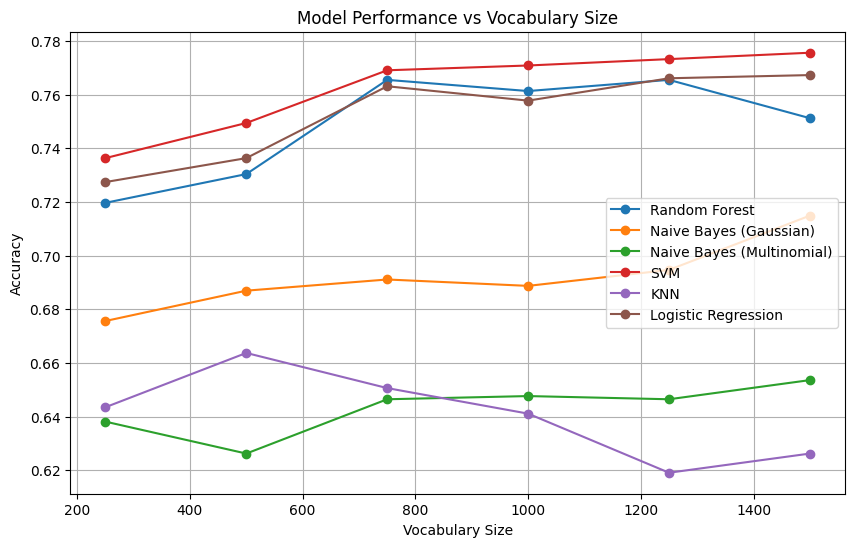
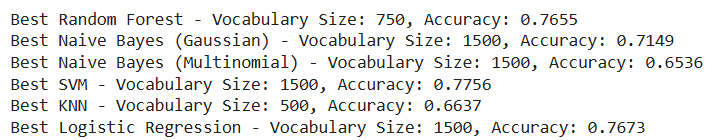

(測試更多size而已)
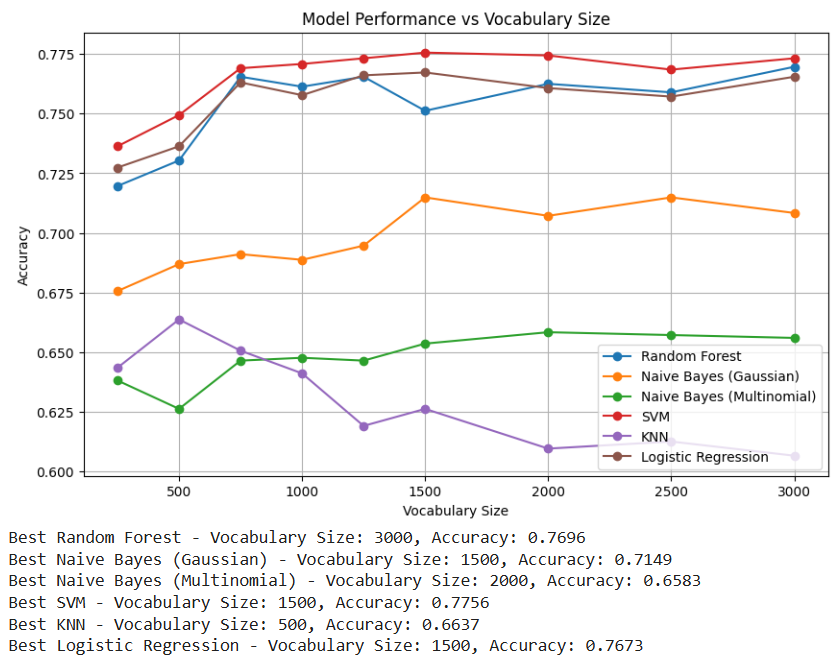

In [19]:
# 確認最後要的size
size = 1500
vocabulary = chi2_results_sorted["feature"].tolist()[:size]
all_data_features = set(vocabulary)

In [20]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train['featured_text'] = X_train['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_val['featured_text'] = X_val['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_test['featured_text'] = X_test['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)

In [21]:
X_train.head()

,text,topic,tokenized_text,combined_text,featured_text
6555,"\nIn April 2023, the National Guard blocked al...",Entertainment,"[april, 2023, nation, guard, block, entranc, d...",april 2023 nation guard block entranc disney w...,april nation guard block world
9362,\nDemocratic senators “sent a letter to the pr...,Politics,"[democrat, senat, “, sent, letter, prosecutor,...",democrat senat “ sent letter prosecutor ukrain...,democrat senat sent letter prosecutor ukrain 2...
11232,PsBattle: Insane rugby try,Entertainment,"[psbattl, insan, rugbi, tri]",psbattl insan rugbi tri,psbattl tri
14969,\n Rudy Giuliani releases another salacious ph...,Society,"[rudi, giuliani, releas, anoth, salaci, photo,...",rudi giuliani releas anoth salaci photo hunter...,releas anoth photo biden
15537,\nFourteen U.S. cities are planning to ban mea...,Society,"[fourteen, u.s., citi, plan, ban, meat, dairi,...",fourteen u.s. citi plan ban meat dairi product...,citi plan ban product privat car accord world ...


### vectorize
* 前面應該要先做feature selection，待補

In [22]:
# 將文章轉為tf-idf與tf vector
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])

# Transform validation and test data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_tf = tf_vectorizer.fit_transform(X_train['text'])

# Transform validation and test data using the same vectorizer
X_val_tf = tf_vectorizer.transform(X_val['text'])
X_test_tf = tf_vectorizer.transform(X_test['text'])


# Print shapes to verify
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_val_tfidf shape: {X_val_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

print(f"X_train_tf shape: {X_train_tf.shape}")
print(f"X_val_tf shape: {X_val_tf.shape}")
print(f"X_test_tf shape: {X_test_tf.shape}")

X_train_tfidf shape: (13436, 59784)
X_val_tfidf shape: (1680, 59784)
X_test_tfidf shape: (1680, 59784)
X_train_tf shape: (13436, 59784)
X_val_tf shape: (1680, 59784)
X_test_tf shape: (1680, 59784)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_val_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_val, rf_predictions))
print(classification_report(y_val, rf_predictions))


# Naive Bayes (Gaussian)
nb_gaussian_classifier = GaussianNB()
nb_gaussian_classifier.fit(X_train_tfidf.toarray(), y_train) # GaussianNB requires dense array
nb_gaussian_predictions = nb_gaussian_classifier.predict(X_val_tfidf.toarray())
print("Naive Bayes (Gaussian) Accuracy:", accuracy_score(y_val, nb_gaussian_predictions))
print(classification_report(y_val, nb_gaussian_predictions))


# Naive Bayes (Multinomial)
nb_multinomial_classifier = MultinomialNB()
nb_multinomial_classifier.fit(X_train_tf, y_train)
nb_multinomial_predictions = nb_multinomial_classifier.predict(X_val_tf)
print("Naive Bayes (Multinomial) Accuracy:", accuracy_score(y_val, nb_multinomial_predictions))
print(classification_report(y_val, nb_multinomial_predictions))


# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_val_tfidf)
print("SVM Accuracy:", accuracy_score(y_val, svm_predictions))
print(classification_report(y_val, svm_predictions))


# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_tfidf, y_train)
knn_predictions = knn_classifier.predict(X_val_tfidf)
print("KNN Accuracy:", accuracy_score(y_val, knn_predictions))
print(classification_report(y_val, knn_predictions))


# Logistic Regression
lr_classifier = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_val_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_predictions))
print(classification_report(y_val, lr_predictions))

Random Forest Accuracy: 0.7726190476190476
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       934
           1       0.87      0.57      0.69       746

    accuracy                           0.77      1680
   macro avg       0.80      0.75      0.76      1680
weighted avg       0.79      0.77      0.76      1680

Naive Bayes (Gaussian) Accuracy: 0.7017857142857142
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       934
           1       0.64      0.74      0.69       746

    accuracy                           0.70      1680
   macro avg       0.70      0.71      0.70      1680
weighted avg       0.71      0.70      0.70      1680

Naive Bayes (Multinomial) Accuracy: 0.7107142857142857
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       934
           1       0.68      0.65      0.67       746

    accuracy                    

## 第一版用1500字feature
我這裡完成了用全部資料當作訓練模型，來評估各個主題下的結果。後續只要把訓練資料換成各類別下再跑訓練(6次)應該就能看出一些東西

In [24]:
# 將文章轉為tf-idf與tf vector


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val['featured_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_tf = tf_vectorizer.fit_transform(X_train['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tf = tf_vectorizer.transform(X_val['featured_text'])
X_test_tf = tf_vectorizer.transform(X_test['featured_text'])


# Print shapes to verify
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_val_tfidf shape: {X_val_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

print(f"X_train_tf shape: {X_train_tf.shape}")
print(f"X_val_tf shape: {X_val_tf.shape}")
print(f"X_test_tf shape: {X_test_tf.shape}")

X_train_tfidf shape: (13436, 1489)
X_val_tfidf shape: (1680, 1489)
X_test_tfidf shape: (1680, 1489)
X_train_tf shape: (13436, 1489)
X_val_tf shape: (1680, 1489)
X_test_tf shape: (1680, 1489)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Evaluating Random Forest...
Random Forest Accuracy: 0.7654761904761904
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       934
           1       0.80      0.63      0.71       746

    accuracy                           0.77      1680
   macro avg       0.77      0.75      0.76      1680
weighted avg       0.77      0.77      0.76      1680



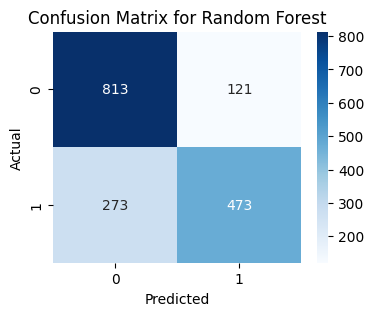

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.7196428571428571
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       934
           1       0.71      0.63      0.67       746

    accuracy                           0.72      1680
   macro avg       0.72      0.71      0.71      1680
weighted avg       0.72      0.72      0.72      1680



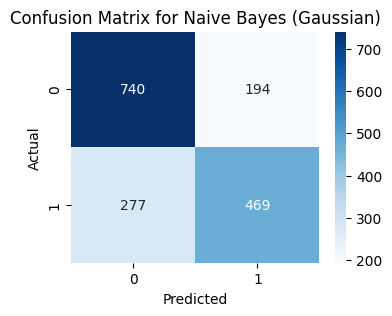

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.6422619047619048
              precision    recall  f1-score   support

           0       0.64      0.81      0.72       934
           1       0.65      0.43      0.52       746

    accuracy                           0.64      1680
   macro avg       0.64      0.62      0.62      1680
weighted avg       0.64      0.64      0.63      1680



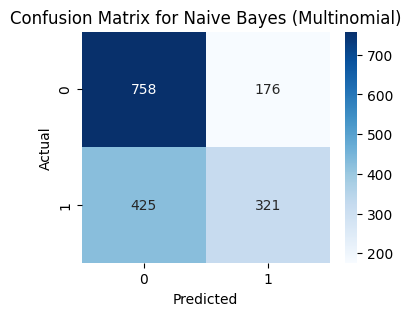

Evaluating SVM...
SVM Accuracy: 0.7755952380952381
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       934
           1       0.82      0.64      0.72       746

    accuracy                           0.78      1680
   macro avg       0.79      0.76      0.77      1680
weighted avg       0.78      0.78      0.77      1680



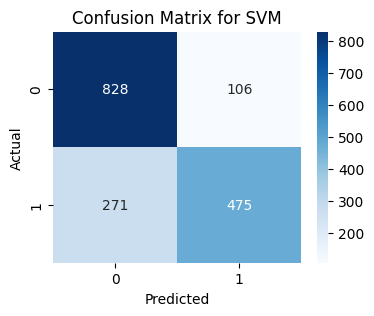

Evaluating KNN...
KNN Accuracy: 0.6190476190476191
              precision    recall  f1-score   support

           0       0.60      0.91      0.73       934
           1       0.69      0.25      0.37       746

    accuracy                           0.62      1680
   macro avg       0.65      0.58      0.55      1680
weighted avg       0.64      0.62      0.57      1680



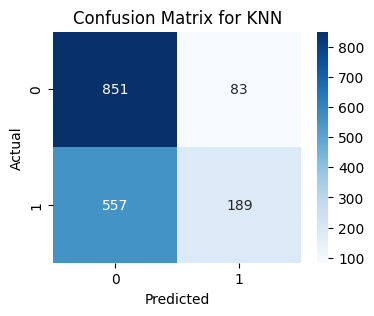

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7702380952380953
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       934
           1       0.79      0.65      0.72       746

    accuracy                           0.77      1680
   macro avg       0.77      0.76      0.76      1680
weighted avg       0.77      0.77      0.77      1680



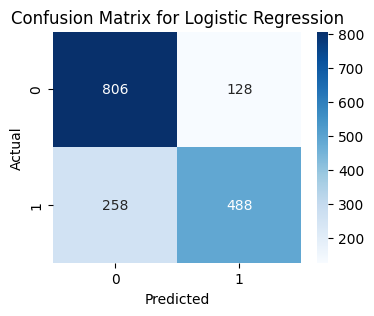

In [26]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test[["topic"]].copy()
eval_results["groundtruth"] = y_test

# 資料準備
X_train_dense = X_train_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_dense = X_test_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_dense, y_train)
        predictions = model.predict(X_test_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_tf, y_train)
        predictions = model.predict(X_test_tf)
    else:
        model.fit(X_train_tfidf, y_train)
        predictions = model.predict(X_test_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [27]:
eval_results

,topic,groundtruth,Random Forest,Naive Bayes (Gaussian),Naive Bayes (Multinomial),SVM,KNN,Logistic Regression
14376,Politics,0,0,0,1,0,0,0
13282,Politics,0,0,1,0,0,0,0
14027,Conflict,1,1,1,0,1,1,1
1380,Entertainment,1,1,1,1,1,0,1
16226,Society,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10237,Conflict,0,0,0,0,0,0,0
15602,Conflict,0,0,0,0,0,0,0
13268,Politics,0,0,0,1,0,0,0
16412,Politics,0,1,0,0,1,0,0


In [28]:
def calculate_metrics(df, topic=None):
    results = []  # 儲存結果的列表
    if topic:
        df = df[df['topic'] == topic]

    number = df[df.columns[0]].count()

    for model in df.columns[2:]:  # 迭代模型欄位（從第三欄開始）
        ground_truth = df['groundtruth']
        predictions = df[model]

        accuracy = accuracy_score(ground_truth, predictions)
        f1 = f1_score(ground_truth, predictions)
        cm = confusion_matrix(ground_truth, predictions)

        # 將結果儲存到列表中
        result = {
            '主題': topic if topic else '全部',
            '模型': model,
            '樣本數': number,
            'Accuracy': accuracy,
            'F1-score': f1,
            'Contingency Table': cm
        }
        results.append(result)

    results_df = pd.DataFrame(results)
    return results_df  # 回傳整理好的表格

f1是指真新聞的(recall+precision)算出來的，剛好不一樣，看大家主要想要以哪一個為主角，可以討論

In [29]:
results_dict = {}
# 計算每個主題的結果並印出表格
for topic in eval_results['topic'].unique():
    results_table = calculate_metrics(eval_results, topic)
    display(results_table)  # 使用 display 函式印出表格
    results_dict[topic] = results_table  # 保存到字典

# 計算所有主題的結果並印出表格
all_results_table = calculate_metrics(eval_results)
display(all_results_table)

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Politics,Random Forest,567,0.747795,0.721248,"[[239, 51], [92, 185]]"
1,Politics,Naive Bayes (Gaussian),567,0.716049,0.706740,"[[212, 78], [83, 194]]"
2,Politics,Naive Bayes (Multinomial),567,0.599647,0.478161,"[[236, 54], [173, 104]]"
3,Politics,SVM,567,0.753086,0.722222,"[[245, 45], [95, 182]]"
4,Politics,KNN,567,0.580247,0.349727,"[[265, 25], [213, 64]]"
5,Politics,Logistic Regression,567,0.749559,0.723735,"[[239, 51], [91, 186]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Conflict,Random Forest,198,0.712121,0.645963,"[[89, 13], [44, 52]]"
1,Conflict,Naive Bayes (Gaussian),198,0.651515,0.601156,"[[77, 25], [44, 52]]"
2,Conflict,Naive Bayes (Multinomial),198,0.575758,0.424658,"[[83, 19], [65, 31]]"
3,Conflict,SVM,198,0.722222,0.666667,"[[88, 14], [41, 55]]"
4,Conflict,KNN,198,0.590909,0.417266,"[[88, 14], [67, 29]]"
5,Conflict,Logistic Regression,198,0.712121,0.662722,"[[85, 17], [40, 56]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Entertainment,Random Forest,360,0.788889,0.696000,"[[197, 16], [60, 87]]"
1,Entertainment,Naive Bayes (Gaussian),360,0.738889,0.632812,"[[185, 28], [66, 81]]"
2,Entertainment,Naive Bayes (Multinomial),360,0.719444,0.573840,"[[191, 22], [79, 68]]"
3,Entertainment,SVM,360,0.805556,0.720000,"[[200, 13], [57, 90]]"
4,Entertainment,KNN,360,0.647222,0.355330,"[[198, 15], [112, 35]]"
5,Entertainment,Logistic Regression,360,0.805556,0.726562,"[[197, 16], [54, 93]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Society,Random Forest,379,0.796834,0.707224,"[[209, 27], [50, 93]]"
1,Society,Naive Bayes (Gaussian),379,0.765172,0.664151,"[[202, 34], [55, 88]]"
2,Society,Naive Bayes (Multinomial),379,0.688654,0.512397,"[[199, 37], [81, 62]]"
3,Society,SVM,379,0.812665,0.723735,"[[215, 21], [50, 93]]"
4,Society,KNN,379,0.659631,0.324607,"[[219, 17], [112, 31]]"
5,Society,Logistic Regression,379,0.812665,0.727969,"[[213, 23], [48, 95]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Business,Random Forest,91,0.824176,0.783784,"[[46, 4], [12, 29]]"
1,Business,Naive Bayes (Gaussian),91,0.659341,0.626506,"[[34, 16], [15, 26]]"
2,Business,Naive Bayes (Multinomial),91,0.637363,0.547945,"[[38, 12], [21, 20]]"
3,Business,SVM,91,0.769231,0.720000,"[[43, 7], [14, 27]]"
4,Business,KNN,91,0.615385,0.385965,"[[45, 5], [30, 11]]"
5,Business,Logistic Regression,91,0.747253,0.708861,"[[40, 10], [13, 28]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Health,Random Forest,85,0.705882,0.683544,"[[33, 10], [15, 27]]"
1,Health,Naive Bayes (Gaussian),85,0.682353,0.674699,"[[30, 13], [14, 28]]"
2,Health,Naive Bayes (Multinomial),85,0.552941,0.654545,"[[11, 32], [6, 36]]"
3,Health,SVM,85,0.764706,0.736842,"[[37, 6], [14, 28]]"
4,Health,KNN,85,0.647059,0.558824,"[[36, 7], [23, 19]]"
5,Health,Logistic Regression,85,0.729412,0.722892,"[[32, 11], [12, 30]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,全部,Random Forest,1680,0.765476,0.705970,"[[813, 121], [273, 473]]"
1,全部,Naive Bayes (Gaussian),1680,0.719643,0.665720,"[[740, 194], [277, 469]]"
2,全部,Naive Bayes (Multinomial),1680,0.642262,0.516492,"[[758, 176], [425, 321]]"
3,全部,SVM,1680,0.775595,0.715901,"[[828, 106], [271, 475]]"
4,全部,KNN,1680,0.619048,0.371316,"[[851, 83], [557, 189]]"
5,全部,Logistic Regression,1680,0.770238,0.716593,"[[806, 128], [258, 488]]"


# a. 類別-Business
這個主題所取的 features 和其他主題類似。測試樣本數較低，大致可以從混淆矩陣看出左下角被分錯的情況略多於右上角，但模型之間的情況不太一致。評估指標也不見得是不分類優於分類後 (NB Multi.、SVM、LR)。模型之間 KNN 指標表現最差，尤其 F1。


## feature selection

In [30]:
# Create a vectorizer to convert text data to numerical features

# 篩選 topic 欄位等於 'Business' 的資料
Xy_train = pd.concat([X_train, y_train], axis=1)
X_train_business = Xy_train[Xy_train['topic'] == 'Business'].drop(columns=['label', 'featured_text'])
y_train_business = Xy_train[Xy_train['topic'] == 'Business']['label']

Xy_val = pd.concat([X_val, y_val], axis=1)
X_val_business = Xy_val[Xy_val['topic'] == 'Business'].drop(columns=['label', 'featured_text'])
y_val_business = Xy_val[Xy_val['topic'] == 'Business']['label']

Xy_test = pd.concat([X_test, y_test], axis=1)
X_test_business = Xy_test[Xy_test['topic'] == 'Business'].drop(columns=['label', 'featured_text'])
y_test_business = Xy_test[Xy_test['topic'] == 'Business']['label']

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_business['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_business)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

      feature   chi2_score        p_value
9322     said  1152.295259  1.422479e-252
11046   trump   920.462801  3.495496e-202
11579      wa   853.444239  1.296532e-187
4939       ha   721.350213  6.808610e-159
10754     thi   680.464059  5.296739e-150
5171       hi   649.365532  3.069697e-143
7998    peopl   465.788042  2.644419e-103
10178   state   464.697300  4.567608e-103
11871   would   382.227356   4.074127e-85
11935    year   367.033274   8.282269e-82
8383   presid   352.679418   1.105770e-78
7630      one   344.372211   7.123583e-77
9416      say   328.412471   2.130864e-73
7580    offic   323.367906   2.674916e-72
7339      new   308.993040   3.618972e-69
10823    time   304.205053   3.996251e-68
5307     hous   287.043292   2.191833e-64
5436   immigr   284.888509   6.461562e-64
2050     case   283.940611   1.039656e-63
8963   report   280.816190   4.985804e-63


In [31]:
# 確認最後要的size
size = 1500
vocabulary = chi2_results_sorted["feature"].tolist()[:size]
business_features = set(vocabulary)

In [32]:
X_train_business.head()

,text,topic,tokenized_text,combined_text
15897,\nThe government passed legislation to give a ...,Business,"[govern, pass, legisl, give, refund, check, dr...",govern pass legisl give refund check driver re...
1089,iPhone cases recalled after reports of chemica...,Business,"[iphon, case, recal, report, chemic, burnsstor...",iphon case recal report chemic burnsstori high...
372,Biden marks LGBTQ+ Pride Month with celebratio...,Business,"[biden, mark, lgbtq+, pride, month, celebr, wh...",biden mark lgbtq+ pride month celebr white hou...
10717,"He Videotaped the Rodney King Beating. Now, He...",Business,"[videotap, rodney, king, beat, auction, camera...",videotap rodney king beat auction camera.mr ho...
15887,\nAn unsolicited email from a suspicious addre...,Business,"[unsolicit, email, suspici, address, associ, p...",unsolicit email suspici address associ publish...


In [33]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_business['featured_text'] = X_train_business['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_val_business['featured_text'] = X_val_business['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_test_business['featured_text'] = X_test_business['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)

## vectorize

In [34]:
# 將文章轉為tf-idf與tf vector
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_business_tfidf = tfidf_vectorizer.fit_transform(X_train_business['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_business_tfidf = tfidf_vectorizer.transform(X_val_business['featured_text'])
X_test_business_tfidf = tfidf_vectorizer.transform(X_test_business['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_business_tf = tf_vectorizer.fit_transform(X_train_business['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_business_tf = tf_vectorizer.transform(X_val_business['featured_text'])
X_test_business_tf = tf_vectorizer.transform(X_test_business['featured_text'])


# Print shapes to verify
print(f"X_train_business_tfidf shape: {X_train_business_tfidf.shape}")
print(f"X_val_business_tfidf shape: {X_val_business_tfidf.shape}")
print(f"X_test_business_tfidf shape: {X_test_business_tfidf.shape}")

print(f"X_train_business_tf shape: {X_train_business_tf.shape}")
print(f"X_val_business_tf shape: {X_val_business_tf.shape}")
print(f"X_test_business_tf shape: {X_test_business_tf.shape}")

X_train_business_tfidf shape: (807, 1487)
X_val_business_tfidf shape: (105, 1487)
X_test_business_tfidf shape: (91, 1487)
X_train_business_tf shape: (807, 1487)
X_val_business_tf shape: (105, 1487)
X_test_business_tf shape: (91, 1487)


## 訓練模型 + 評估模型

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Evaluating Random Forest...
Random Forest Accuracy: 0.7802197802197802
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        50
           1       0.92      0.56      0.70        41

    accuracy                           0.78        91
   macro avg       0.82      0.76      0.76        91
weighted avg       0.81      0.78      0.77        91



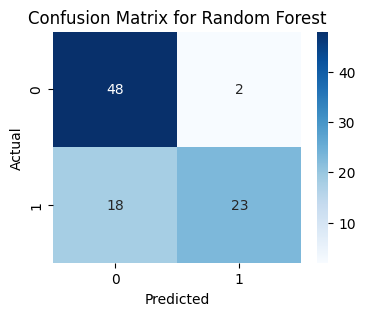

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.6483516483516484
              precision    recall  f1-score   support

           0       0.78      0.50      0.61        50
           1       0.58      0.83      0.68        41

    accuracy                           0.65        91
   macro avg       0.68      0.66      0.64        91
weighted avg       0.69      0.65      0.64        91



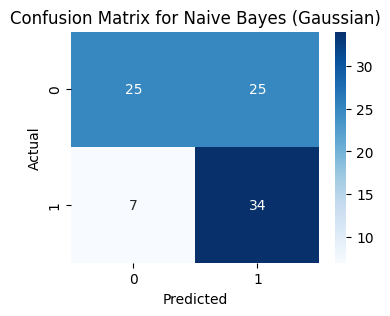

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.7252747252747253
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        50
           1       0.68      0.73      0.71        41

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



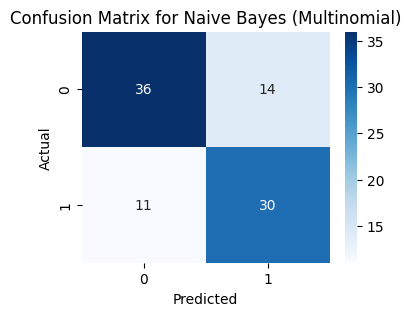

Evaluating SVM...
SVM Accuracy: 0.7912087912087912
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        50
           1       0.89      0.61      0.72        41

    accuracy                           0.79        91
   macro avg       0.82      0.77      0.78        91
weighted avg       0.81      0.79      0.78        91



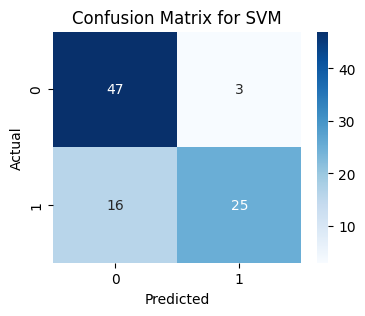

Evaluating KNN...
KNN Accuracy: 0.5604395604395604
              precision    recall  f1-score   support

           0       0.56      0.96      0.71        50
           1       0.60      0.07      0.13        41

    accuracy                           0.56        91
   macro avg       0.58      0.52      0.42        91
weighted avg       0.58      0.56      0.45        91



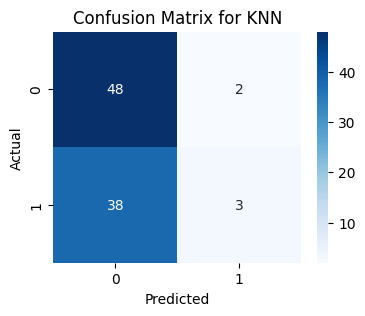

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.8021978021978022
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        50
           1       0.90      0.63      0.74        41

    accuracy                           0.80        91
   macro avg       0.83      0.79      0.79        91
weighted avg       0.82      0.80      0.80        91



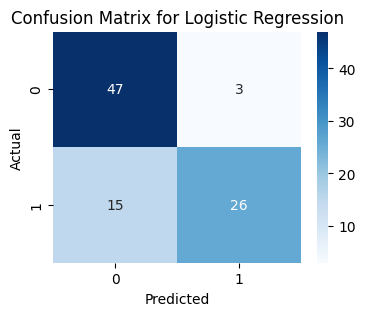

In [36]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_business[["topic"]].copy()
eval_results["groundtruth"] = y_test_business

# 資料準備
X_train_business_dense = X_train_business_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_business_dense = X_test_business_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_business_dense, y_train_business)
        predictions = model.predict(X_test_business_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_business_tf, y_train_business)
        predictions = model.predict(X_test_business_tf)
    else:
        model.fit(X_train_business_tfidf, y_train_business)
        predictions = model.predict(X_test_business_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_business, predictions)
    report = classification_report(y_test_business, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_business, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_business, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [37]:
results_table_business = calculate_metrics(eval_results, topic = "Business")
display(results_table_business)  # 使用 display 函式印出表格

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Business,Random Forest,91,0.780220,0.696970,"[[48, 2], [18, 23]]"
1,Business,Naive Bayes (Gaussian),91,0.648352,0.680000,"[[25, 25], [7, 34]]"
2,Business,Naive Bayes (Multinomial),91,0.725275,0.705882,"[[36, 14], [11, 30]]"
3,Business,SVM,91,0.791209,0.724638,"[[47, 3], [16, 25]]"
4,Business,KNN,91,0.560440,0.130435,"[[48, 2], [38, 3]]"
5,Business,Logistic Regression,91,0.802198,0.742857,"[[47, 3], [15, 26]]"


## 全部文章隨機抽 1003(807+105+91) 筆


In [38]:
random_rows = df_filtered.sample(n=1003, random_state=42)  # random_state 確保結果可重現

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (combining validation and test)
X_train_1003, X_temp_1003, y_train_1003, y_temp_1003 = train_test_split(
    random_rows.drop('label', axis=1),  # Features (excluding the label column)
    random_rows['label'],  # Target variable (the label column)
    test_size=196,  # Size of the temporary set (validation + test)
    random_state=42,  # Set a random state for reproducibility
    stratify=random_rows['label'] # ensures the label proportions are maintained in each split
)

# Calculate the ratio of validation set within the temporary set
validation_ratio_temp = validation_ratio / (validation_ratio + test_ratio)

# Split the temporary set into validation and test sets
X_val_1003, X_test_1003, y_val_1003, y_test_1003 = train_test_split(
    X_temp_1003,
    y_temp_1003,
    test_size=91,
    random_state=42,
    stratify=y_temp_1003 # ensures the label proportions are maintained in each split
)

# Print the shapes of the resulting sets to verify the split
print(f"Training data shape: {X_train_1003.shape}, {y_train_1003.shape}")
print(f"Validation data shape: {X_val_1003.shape}, {y_val_1003.shape}")
print(f"Testing data shape: {X_test_1003.shape}, {y_test_1003.shape}")

Training data shape: (807, 3), (807,)
Validation data shape: (105, 3), (105,)
Testing data shape: (91, 3), (91,)


In [40]:
# prompt: do feature selection using chi-square
# Combine tokenized text into a single string for each document.
X_train_1003['combined_text'] = X_train_1003['tokenized_text'].apply(lambda x: ' '.join(x))

# Create a vectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_1003['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_1003)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

        feature  chi2_score        p_value
9035       said  692.797405  1.101456e-152
10894        wa  588.461399  5.414732e-130
9751      state  555.319499  8.765827e-123
10453     trump  501.882989  3.700595e-111
5317         ha  398.765941   1.022292e-88
10883      vote  315.001451   1.777132e-70
7904      peopl  305.527743   2.058251e-68
1930         ap  292.313946   1.557310e-65
5492         hi  291.977217   1.843927e-65
10214       thi  261.778296   7.029026e-59
2765       call  245.107652   3.027312e-55
11208      year  244.994081   3.204930e-55
545        2015  242.436296   1.157431e-54
7596        one  239.471428   5.128121e-54
5427     health  202.770831   5.190327e-46
8243     presid  201.840019   8.285288e-46
7561     offici  200.021806   2.065729e-45
3782   democrat  193.896934   4.484962e-44
7345        new  188.392335   7.132756e-43
11151     would  176.986710   2.204823e-40


In [41]:
# 確認最後要的size
size = 1500
vocabulary_1003 = chi2_results_sorted["feature"].tolist()[:size]
all_data_features_1003 = set(vocabulary_1003)

In [42]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_1003['featured_text'] = X_train_1003['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_1003])
)
X_val_1003['featured_text'] = X_val_1003['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_1003])
)
X_test_1003['featured_text'] = X_test_1003['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_1003])
)

In [43]:
# 將文章轉為tf-idf與tf vector

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_1003['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val_1003['featured_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test_1003['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_tf = tf_vectorizer.fit_transform(X_train_1003['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tf = tf_vectorizer.transform(X_val_1003['featured_text'])
X_test_tf = tf_vectorizer.transform(X_test_1003['featured_text'])


# Print shapes to verify
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_val_tfidf shape: {X_val_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

print(f"X_train_tf shape: {X_train_tf.shape}")
print(f"X_val_tf shape: {X_val_tf.shape}")
print(f"X_test_tf shape: {X_test_tf.shape}")

X_train_tfidf shape: (807, 1484)
X_val_tfidf shape: (105, 1484)
X_test_tfidf shape: (91, 1484)
X_train_tf shape: (807, 1484)
X_val_tf shape: (105, 1484)
X_test_tf shape: (91, 1484)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Evaluating Random Forest...
Random Forest Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        51
           1       0.81      0.62      0.70        40

    accuracy                           0.77        91
   macro avg       0.78      0.75      0.76        91
weighted avg       0.77      0.77      0.76        91



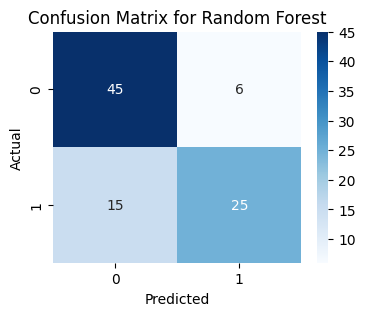

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.6593406593406593
              precision    recall  f1-score   support

           0       0.78      0.55      0.64        51
           1       0.58      0.80      0.67        40

    accuracy                           0.66        91
   macro avg       0.68      0.67      0.66        91
weighted avg       0.69      0.66      0.66        91



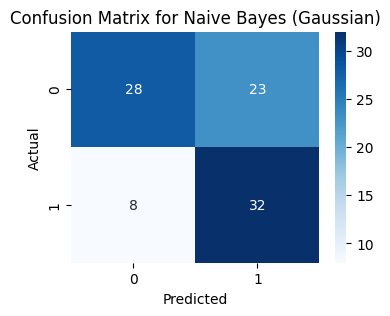

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.7472527472527473
              precision    recall  f1-score   support

           0       0.75      0.82      0.79        51
           1       0.74      0.65      0.69        40

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.74        91



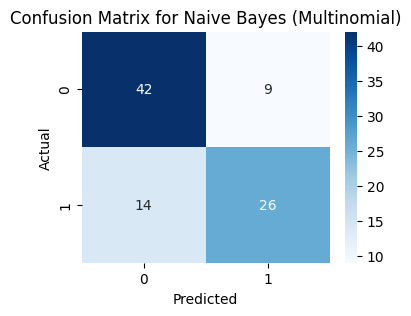

Evaluating SVM...
SVM Accuracy: 0.7472527472527473
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        51
           1       0.79      0.57      0.67        40

    accuracy                           0.75        91
   macro avg       0.76      0.73      0.73        91
weighted avg       0.76      0.75      0.74        91



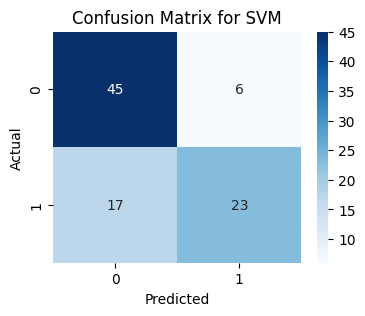

Evaluating KNN...
KNN Accuracy: 0.5824175824175825
              precision    recall  f1-score   support

           0       0.58      0.92      0.71        51
           1       0.60      0.15      0.24        40

    accuracy                           0.58        91
   macro avg       0.59      0.54      0.48        91
weighted avg       0.59      0.58      0.50        91



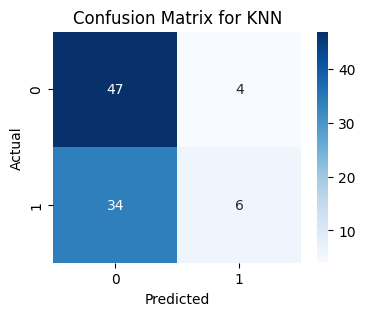

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.8021978021978022
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.82      0.70      0.76        40

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91



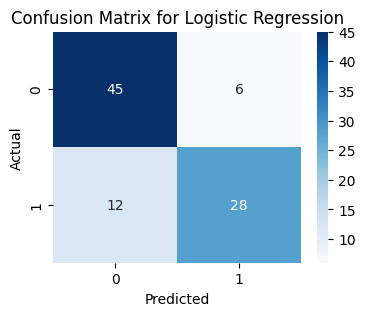

In [45]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_1003[["topic"]].copy()
eval_results["groundtruth"] = y_test_1003

# 資料準備
X_train_dense = X_train_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_dense = X_test_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_dense, y_train_1003)
        predictions = model.predict(X_test_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_tf, y_train_1003)
        predictions = model.predict(X_test_tf)
    else:
        model.fit(X_train_tfidf, y_train_1003)
        predictions = model.predict(X_test_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_1003, predictions)
    report = classification_report(y_test_1003, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_1003, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_1003, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_1003), yticklabels=np.unique(y_test_1003))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [46]:
eval_results

,topic,groundtruth,Random Forest,Naive Bayes (Gaussian),Naive Bayes (Multinomial),SVM,KNN,Logistic Regression
1513,Business,1,1,1,1,1,0,1
7467,Entertainment,0,0,0,0,0,0,0
10047,Conflict,0,0,1,0,0,0,0
6729,Entertainment,0,0,1,0,0,0,0
15999,Business,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
2556,Politics,0,0,0,0,0,0,0
10178,Conflict,0,0,1,1,0,0,0
5420,Politics,0,1,1,1,1,0,1
12430,Entertainment,0,0,0,0,0,0,0


In [47]:
results_dict = {}
# 計算每個主題的結果並印出表格
for topic in eval_results['topic'].unique():
    results_table = calculate_metrics(eval_results, topic)
    display(results_table)  # 使用 display 函式印出表格
    results_dict[topic] = results_table  # 保存到字典

# 計算所有主題的結果並印出表格
all_results_table = calculate_metrics(eval_results)
display(all_results_table)

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Business,Random Forest,8,0.500,0.500000,"[[2, 0], [4, 2]]"
1,Business,Naive Bayes (Gaussian),8,0.750,0.833333,"[[1, 1], [1, 5]]"
2,Business,Naive Bayes (Multinomial),8,0.375,0.444444,"[[1, 1], [4, 2]]"
3,Business,SVM,8,0.500,0.600000,"[[1, 1], [3, 3]]"
4,Business,KNN,8,0.250,0.000000,"[[2, 0], [6, 0]]"
5,Business,Logistic Regression,8,0.500,0.600000,"[[1, 1], [3, 3]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Entertainment,Random Forest,18,0.888889,0.857143,"[[10, 0], [2, 6]]"
1,Entertainment,Naive Bayes (Gaussian),18,0.722222,0.705882,"[[7, 3], [2, 6]]"
2,Entertainment,Naive Bayes (Multinomial),18,0.833333,0.769231,"[[10, 0], [3, 5]]"
3,Entertainment,SVM,18,0.777778,0.666667,"[[10, 0], [4, 4]]"
4,Entertainment,KNN,18,0.666667,0.400000,"[[10, 0], [6, 2]]"
5,Entertainment,Logistic Regression,18,0.888889,0.857143,"[[10, 0], [2, 6]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Conflict,Random Forest,11,0.818182,0.800000,"[[5, 1], [1, 4]]"
1,Conflict,Naive Bayes (Gaussian),11,0.545455,0.666667,"[[1, 5], [0, 5]]"
2,Conflict,Naive Bayes (Multinomial),11,0.727273,0.769231,"[[3, 3], [0, 5]]"
3,Conflict,SVM,11,0.909091,0.909091,"[[5, 1], [0, 5]]"
4,Conflict,KNN,11,0.454545,0.000000,"[[5, 1], [5, 0]]"
5,Conflict,Logistic Regression,11,0.909091,0.909091,"[[5, 1], [0, 5]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Society,Random Forest,20,0.85,0.727273,"[[13, 1], [2, 4]]"
1,Society,Naive Bayes (Gaussian),20,0.65,0.533333,"[[9, 5], [2, 4]]"
2,Society,Naive Bayes (Multinomial),20,0.75,0.545455,"[[12, 2], [3, 3]]"
3,Society,SVM,20,0.80,0.600000,"[[13, 1], [3, 3]]"
4,Society,KNN,20,0.65,0.000000,"[[13, 1], [6, 0]]"
5,Society,Logistic Regression,20,0.90,0.833333,"[[13, 1], [1, 5]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Health,Random Forest,5,0.4,0.400000,"[[1, 1], [2, 1]]"
1,Health,Naive Bayes (Gaussian),5,0.8,0.857143,"[[1, 1], [0, 3]]"
2,Health,Naive Bayes (Multinomial),5,0.8,0.857143,"[[1, 1], [0, 3]]"
3,Health,SVM,5,0.8,0.800000,"[[2, 0], [1, 2]]"
4,Health,KNN,5,0.6,0.500000,"[[2, 0], [2, 1]]"
5,Health,Logistic Regression,5,0.8,0.800000,"[[2, 0], [1, 2]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Politics,Random Forest,29,0.758621,0.695652,"[[14, 3], [4, 8]]"
1,Politics,Naive Bayes (Gaussian),29,0.620690,0.620690,"[[9, 8], [3, 9]]"
2,Politics,Naive Bayes (Multinomial),29,0.793103,0.727273,"[[15, 2], [4, 8]]"
3,Politics,SVM,29,0.689655,0.571429,"[[14, 3], [6, 6]]"
4,Politics,KNN,29,0.620690,0.352941,"[[15, 2], [9, 3]]"
5,Politics,Logistic Regression,29,0.724138,0.636364,"[[14, 3], [5, 7]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,全部,Random Forest,91,0.769231,0.704225,"[[45, 6], [15, 25]]"
1,全部,Naive Bayes (Gaussian),91,0.659341,0.673684,"[[28, 23], [8, 32]]"
2,全部,Naive Bayes (Multinomial),91,0.747253,0.693333,"[[42, 9], [14, 26]]"
3,全部,SVM,91,0.747253,0.666667,"[[45, 6], [17, 23]]"
4,全部,KNN,91,0.582418,0.240000,"[[47, 4], [34, 6]]"
5,全部,Logistic Regression,91,0.802198,0.756757,"[[45, 6], [12, 28]]"


# b. 類別-Conflict
這裡的feature都取的跟其他類似，也沒有明顯分錯哪一種的傾向，像politics混淆矩陣左下角就蠻有這個傾向。模型大同小異，唯獨kNN極差，猜測只看前幾個相似度高文章的用字，雖然feature中的用字都很類似，但並不能拿來辨別真偽，可能也是一個不要取feature的證明(?)。

## feature selection

In [48]:
# Create a vectorizer to convert text data to numerical features

# 篩選 topic 欄位等於 'Conflict' 的資料
Xy_train = pd.concat([X_train, y_train], axis=1)
X_train_conflict = Xy_train[Xy_train['topic'] == 'Conflict'].drop(columns=['label', 'featured_text'])
y_train_conflict = Xy_train[Xy_train['topic'] == 'Conflict']['label']

Xy_val = pd.concat([X_val, y_val], axis=1)
X_val_conflict = Xy_val[Xy_val['topic'] == 'Conflict'].drop(columns=['label', 'featured_text'])
y_val_conflict = Xy_val[Xy_val['topic'] == 'Conflict']['label']

Xy_test = pd.concat([X_test, y_test], axis=1)
X_test_conflict = Xy_test[Xy_test['topic'] == 'Conflict'].drop(columns=['label', 'featured_text'])
y_test_conflict = Xy_test[Xy_test['topic'] == 'Conflict']['label']



vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_conflict['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_conflict)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

       feature  chi2_score        p_value
11712     said  902.048321  3.519986e-198
14519       wa  849.839558  7.878560e-187
6524        hi  619.703361  8.675111e-137
10606   presid  473.495059  5.561915e-105
6242        ha  410.464142   2.904657e-91
13468      thi  367.616097   6.183697e-82
13820    trump  330.621095   7.039023e-74
12782    state  307.595820   7.293996e-69
9640     offic  265.679618   9.920772e-60
14990     year  251.722527   1.093750e-56
14421  vindman  248.636039   5.149899e-56
11305   report  248.453686   5.643573e-56
14908    would  245.209207   2.876838e-55
2567      call  230.513512   4.606326e-52
7910       law  225.144576   6.827753e-51
9704       one  223.676102   1.427452e-50
11872   school  214.777115   1.246491e-48
9098        mr  214.700466   1.295418e-48
1150      also  209.181474   2.072271e-47
2639   capitol  203.829963   3.048504e-46


In [49]:
# 確認最後要的size
size = 1500
vocabulary = chi2_results_sorted["feature"].tolist()[:size]
conflict_features = set(vocabulary)

In [50]:
X_train_conflict.head()

,text,topic,tokenized_text,combined_text
2012,"After the Ohio Train Derailment: Evacuations, ...",Conflict,"[ohio, train, derail, evacu, toxic, chemic, wa...",ohio train derail evacu toxic chemic water wor...
5364,Ronald A. KlainRonald A. Klain\n\nEducation: H...,Conflict,"[ronald, a., klainronald, a., klain, educ, har...",ronald a. klainronald a. klain educ harvard la...
10231,\nAuthorities warned about more attacks on Wal...,Conflict,"[author, warn, attack, walmart, target, store,...",author warn attack walmart target store el pas...
13539,\nA video shared widely in March 2022 showed U...,Conflict,"[video, share, wide, march, 2022, show, ukrain...",video share wide march 2022 show ukrainian pre...
13977,"A First Lady at 50, Finding Her Own PathWASHIN...",Conflict,"[first, ladi, 50, find, pathwashington, —, ha,...",first ladi 50 find pathwashington — ha perfect...


In [51]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_conflict['featured_text'] = X_train_conflict['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_val_conflict['featured_text'] = X_val_conflict['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_test_conflict['featured_text'] = X_test_conflict['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)

## vectorize

In [52]:
# 將文章轉為tf-idf與tf vector
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_conflict_tfidf = tfidf_vectorizer.fit_transform(X_train_conflict['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_conflict_tfidf = tfidf_vectorizer.transform(X_val_conflict['featured_text'])
X_test_conflict_tfidf = tfidf_vectorizer.transform(X_test_conflict['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_conflict_tf = tf_vectorizer.fit_transform(X_train_conflict['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_conflict_tf = tf_vectorizer.transform(X_val_conflict['featured_text'])
X_test_conflict_tf = tf_vectorizer.transform(X_test_conflict['featured_text'])


# Print shapes to verify
print(f"X_train_conflict_tfidf shape: {X_train_conflict_tfidf.shape}")
print(f"X_val_conflict_tfidf shape: {X_val_conflict_tfidf.shape}")
print(f"X_test_conflict_tfidf shape: {X_test_conflict_tfidf.shape}")

print(f"X_train_conflict_tf shape: {X_train_conflict_tf.shape}")
print(f"X_val_conflict_tf shape: {X_val_conflict_tf.shape}")
print(f"X_test_conflict_tf shape: {X_test_conflict_tf.shape}")

X_train_conflict_tfidf shape: (1356, 1483)
X_val_conflict_tfidf shape: (164, 1483)
X_test_conflict_tfidf shape: (198, 1483)
X_train_conflict_tf shape: (1356, 1483)
X_val_conflict_tf shape: (164, 1483)
X_test_conflict_tf shape: (198, 1483)


## 訓練模型 + 評估模型

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Evaluating Random Forest...
Random Forest Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       102
           1       0.67      0.60      0.64        96

    accuracy                           0.67       198
   macro avg       0.67      0.66      0.66       198
weighted avg       0.67      0.67      0.67       198



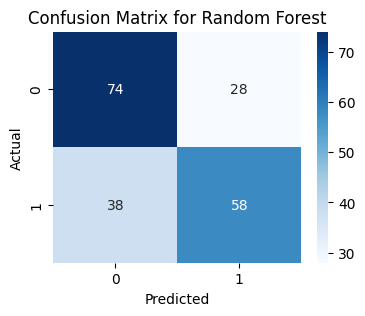

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.6060606060606061
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       102
           1       0.59      0.61      0.60        96

    accuracy                           0.61       198
   macro avg       0.61      0.61      0.61       198
weighted avg       0.61      0.61      0.61       198



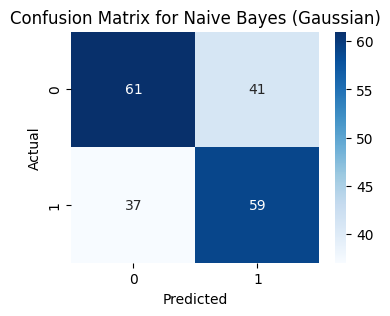

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.5757575757575758
              precision    recall  f1-score   support

           0       0.60      0.54      0.57       102
           1       0.56      0.61      0.58        96

    accuracy                           0.58       198
   macro avg       0.58      0.58      0.58       198
weighted avg       0.58      0.58      0.58       198



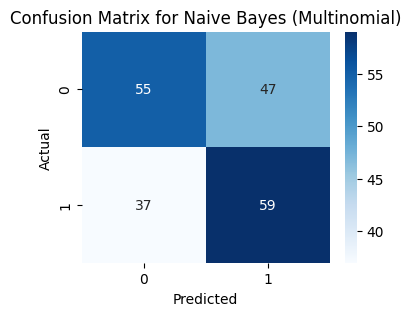

Evaluating SVM...
SVM Accuracy: 0.6616161616161617
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       102
           1       0.66      0.64      0.65        96

    accuracy                           0.66       198
   macro avg       0.66      0.66      0.66       198
weighted avg       0.66      0.66      0.66       198



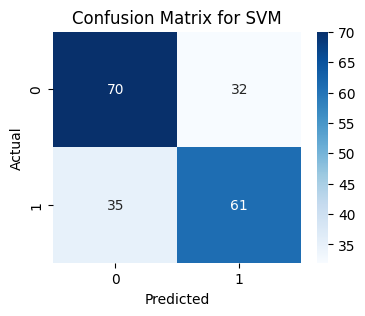

Evaluating KNN...
KNN Accuracy: 0.4797979797979798
              precision    recall  f1-score   support

           0       0.50      0.78      0.61       102
           1       0.41      0.16      0.23        96

    accuracy                           0.48       198
   macro avg       0.45      0.47      0.42       198
weighted avg       0.45      0.48      0.42       198



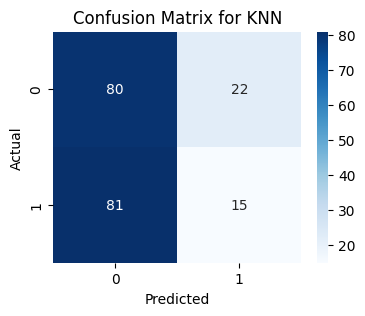

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.6767676767676768
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       102
           1       0.67      0.66      0.66        96

    accuracy                           0.68       198
   macro avg       0.68      0.68      0.68       198
weighted avg       0.68      0.68      0.68       198



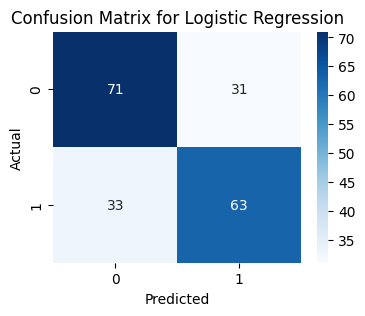

In [54]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_conflict[["topic"]].copy()
eval_results["groundtruth"] = y_test_conflict

# 資料準備
X_train_conflict_dense = X_train_conflict_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_conflict_dense = X_test_conflict_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_conflict_dense, y_train_conflict)
        predictions = model.predict(X_test_conflict_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_conflict_tf, y_train_conflict)
        predictions = model.predict(X_test_conflict_tf)
    else:
        model.fit(X_train_conflict_tfidf, y_train_conflict)
        predictions = model.predict(X_test_conflict_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_conflict, predictions)
    report = classification_report(y_test_conflict, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_conflict, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_conflict, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [55]:
results_table_conflict = calculate_metrics(eval_results, topic = "Conflict")
display(results_table_conflict)  # 使用 display 函式印出表格

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Conflict,Random Forest,198,0.666667,0.637363,"[[74, 28], [38, 58]]"
1,Conflict,Naive Bayes (Gaussian),198,0.606061,0.602041,"[[61, 41], [37, 59]]"
2,Conflict,Naive Bayes (Multinomial),198,0.575758,0.584158,"[[55, 47], [37, 59]]"
3,Conflict,SVM,198,0.661616,0.645503,"[[70, 32], [35, 61]]"
4,Conflict,KNN,198,0.479798,0.225564,"[[80, 22], [81, 15]]"
5,Conflict,Logistic Regression,198,0.676768,0.663158,"[[71, 31], [33, 63]]"


## 全部文章隨機抽 1718(1356+164+198) 筆




In [56]:
random_rows = df_filtered.sample(n=1718, random_state=42)  # random_state 確保結果可重現

In [57]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (combining validation and test)
X_train_1718, X_temp_1718, y_train_1718, y_temp_1718 = train_test_split(
    random_rows.drop('label', axis=1),  # Features (excluding the label column)
    random_rows['label'],  # Target variable (the label column)
    test_size=362,  # Size of the temporary set (validation + test)
    random_state=42,  # Set a random state for reproducibility
    stratify=random_rows['label'] # ensures the label proportions are maintained in each split
)

# Calculate the ratio of validation set within the temporary set
validation_ratio_temp = validation_ratio / (validation_ratio + test_ratio)

# Split the temporary set into validation and test sets
X_val_1718, X_test_1718, y_val_1718, y_test_1718 = train_test_split(
    X_temp_1718,
    y_temp_1718,
    test_size=198,
    random_state=42,
    stratify=y_temp_1718 # ensures the label proportions are maintained in each split
)

# Print the shapes of the resulting sets to verify the split
print(f"Training data shape: {X_train_1718.shape}, {y_train_1718.shape}")
print(f"Validation data shape: {X_val_1718.shape}, {y_val_1718.shape}")
print(f"Testing data shape: {X_test_1718.shape}, {y_test_1718.shape}")

Training data shape: (1356, 3), (1356,)
Validation data shape: (164, 3), (164,)
Testing data shape: (198, 3), (198,)


In [58]:
# prompt: do feature selection using chi-square
# Combine tokenized text into a single string for each document.
X_train_1718['combined_text'] = X_train_1718['tokenized_text'].apply(lambda x: ' '.join(x))

# Create a vectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_1718['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_1718)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

        feature  chi2_score        p_value
11854      said  867.931071  9.190963e-191
14416        wa  835.662378  9.519774e-184
12840     state  582.978246  8.438291e-129
10387     peopl  534.127552  3.572597e-118
13786     trump  487.092639  6.115395e-108
6763         ha  472.695618  8.302065e-105
13470       thi  433.315689   3.084857e-96
14203    vaccin  358.244829   6.788440e-80
3334       call  343.018738   1.404273e-76
6521         go  322.623085   3.886367e-72
14777     would  319.579892   1.788175e-71
6917     health  307.252417   8.665139e-69
2196         ap  306.138392   1.515189e-68
14854      year  302.870125   7.806881e-68
11946       say  293.973698   6.772415e-66
9962        one  288.384119   1.118525e-64
2055   american  275.222204   8.256428e-62
8448       like  269.887447   1.200714e-60
14399      vote  266.068671   8.161091e-60
6431        get  264.936746   1.440329e-59


In [59]:
# 確認最後要的size
size = 1500
vocabulary_1718 = chi2_results_sorted["feature"].tolist()[:size]
all_data_features_1718 = set(vocabulary_1718)

In [60]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_1718['featured_text'] = X_train_1718['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_1718])
)
X_val_1718['featured_text'] = X_val_1718['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_1718])
)
X_test_1718['featured_text'] = X_test_1718['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_1718])
)

In [61]:
# 將文章轉為tf-idf與tf vector

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_1718['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val_1718['featured_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test_1718['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_tf = tf_vectorizer.fit_transform(X_train_1718['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tf = tf_vectorizer.transform(X_val_1718['featured_text'])
X_test_tf = tf_vectorizer.transform(X_test_1718['featured_text'])


# Print shapes to verify
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_val_tfidf shape: {X_val_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

print(f"X_train_tf shape: {X_train_tf.shape}")
print(f"X_val_tf shape: {X_val_tf.shape}")
print(f"X_test_tf shape: {X_test_tf.shape}")

X_train_tfidf shape: (1356, 1487)
X_val_tfidf shape: (164, 1487)
X_test_tfidf shape: (198, 1487)
X_train_tf shape: (1356, 1487)
X_val_tf shape: (164, 1487)
X_test_tf shape: (198, 1487)


Evaluating Random Forest...
Random Forest Accuracy: 0.6919191919191919
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       108
           1       0.72      0.53      0.61        90

    accuracy                           0.69       198
   macro avg       0.70      0.68      0.68       198
weighted avg       0.70      0.69      0.68       198



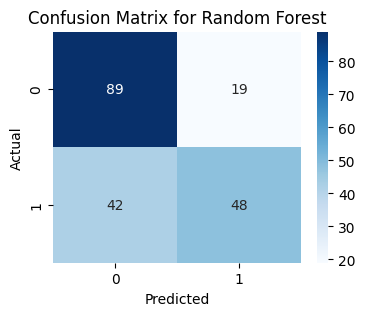

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.6919191919191919
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       108
           1       0.64      0.76      0.69        90

    accuracy                           0.69       198
   macro avg       0.70      0.70      0.69       198
weighted avg       0.70      0.69      0.69       198



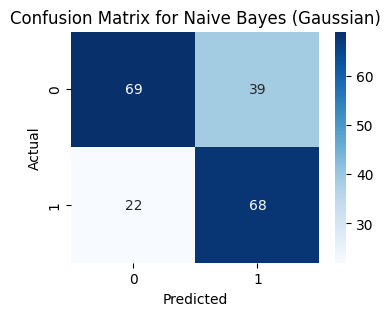

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.702020202020202
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       108
           1       0.67      0.69      0.68        90

    accuracy                           0.70       198
   macro avg       0.70      0.70      0.70       198
weighted avg       0.70      0.70      0.70       198



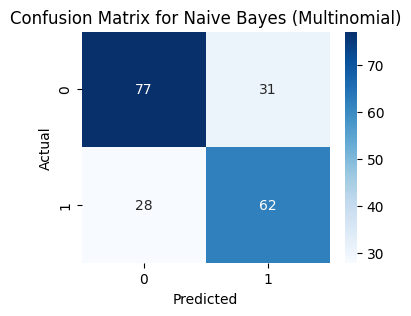

Evaluating SVM...
SVM Accuracy: 0.696969696969697
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       108
           1       0.71      0.56      0.62        90

    accuracy                           0.70       198
   macro avg       0.70      0.69      0.69       198
weighted avg       0.70      0.70      0.69       198



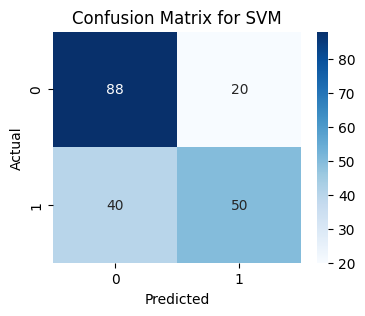

Evaluating KNN...
KNN Accuracy: 0.5606060606060606
              precision    recall  f1-score   support

           0       0.56      0.97      0.71       108
           1       0.67      0.07      0.12        90

    accuracy                           0.56       198
   macro avg       0.61      0.52      0.41       198
weighted avg       0.61      0.56      0.44       198



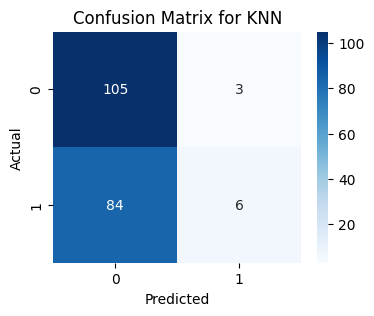

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       108
           1       0.73      0.61      0.67        90

    accuracy                           0.72       198
   macro avg       0.72      0.71      0.71       198
weighted avg       0.72      0.72      0.72       198



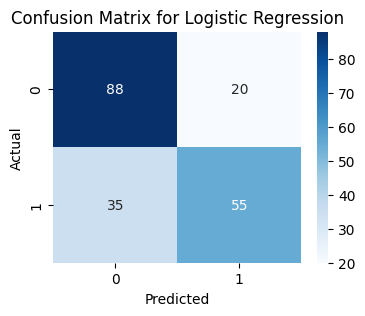

In [62]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_1718[["topic"]].copy()
eval_results["groundtruth"] = y_test_1718

# 資料準備
X_train_dense = X_train_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_dense = X_test_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_dense, y_train_1718)
        predictions = model.predict(X_test_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_tf, y_train_1718)
        predictions = model.predict(X_test_tf)
    else:
        model.fit(X_train_tfidf, y_train_1718)
        predictions = model.predict(X_test_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_1718, predictions)
    report = classification_report(y_test_1718, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_1718, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_1718, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_1718), yticklabels=np.unique(y_test_1718))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [63]:
eval_results

,topic,groundtruth,Random Forest,Naive Bayes (Gaussian),Naive Bayes (Multinomial),SVM,KNN,Logistic Regression
12405,Entertainment,0,0,1,0,1,0,1
15013,Entertainment,1,0,1,1,0,0,0
15477,Politics,0,0,1,0,0,0,0
13001,Society,0,0,1,1,0,0,0
5599,Politics,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
2457,Entertainment,0,0,0,0,0,0,0
6470,Conflict,0,0,1,0,0,0,0
1008,Politics,1,1,1,1,1,1,1
102,Health,1,1,1,1,1,0,1


In [64]:
results_dict = {}
# 計算每個主題的結果並印出表格
for topic in eval_results['topic'].unique():
    results_table = calculate_metrics(eval_results, topic)
    display(results_table)  # 使用 display 函式印出表格
    results_dict[topic] = results_table  # 保存到字典

# 計算所有主題的結果並印出表格
all_results_table = calculate_metrics(eval_results)
display(all_results_table)

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Entertainment,Random Forest,50,0.72,0.588235,"[[26, 2], [12, 10]]"
1,Entertainment,Naive Bayes (Gaussian),50,0.72,0.681818,"[[21, 7], [7, 15]]"
2,Entertainment,Naive Bayes (Multinomial),50,0.76,0.714286,"[[23, 5], [7, 15]]"
3,Entertainment,SVM,50,0.76,0.647059,"[[27, 1], [11, 11]]"
4,Entertainment,KNN,50,0.54,0.000000,"[[27, 1], [22, 0]]"
5,Entertainment,Logistic Regression,50,0.76,0.647059,"[[27, 1], [11, 11]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Politics,Random Forest,62,0.596774,0.561404,"[[21, 7], [18, 16]]"
1,Politics,Naive Bayes (Gaussian),62,0.661290,0.704225,"[[16, 12], [9, 25]]"
2,Politics,Naive Bayes (Multinomial),62,0.564516,0.571429,"[[17, 11], [16, 18]]"
3,Politics,SVM,62,0.612903,0.612903,"[[19, 9], [15, 19]]"
4,Politics,KNN,62,0.500000,0.243902,"[[26, 2], [29, 5]]"
5,Politics,Logistic Regression,62,0.661290,0.666667,"[[20, 8], [13, 21]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Society,Random Forest,52,0.750000,0.648649,"[[27, 6], [7, 12]]"
1,Society,Naive Bayes (Gaussian),52,0.692308,0.652174,"[[21, 12], [4, 15]]"
2,Society,Naive Bayes (Multinomial),52,0.711538,0.651163,"[[23, 10], [5, 14]]"
3,Society,SVM,52,0.769231,0.684211,"[[27, 6], [6, 13]]"
4,Society,KNN,52,0.634615,0.000000,"[[33, 0], [19, 0]]"
5,Society,Logistic Regression,52,0.769231,0.700000,"[[26, 7], [5, 14]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Conflict,Random Forest,21,0.666667,0.588235,"[[9, 4], [3, 5]]"
1,Conflict,Naive Bayes (Gaussian),21,0.666667,0.666667,"[[7, 6], [1, 7]]"
2,Conflict,Naive Bayes (Multinomial),21,0.857143,0.842105,"[[10, 3], [0, 8]]"
3,Conflict,SVM,21,0.619048,0.428571,"[[10, 3], [5, 3]]"
4,Conflict,KNN,21,0.666667,0.222222,"[[13, 0], [7, 1]]"
5,Conflict,Logistic Regression,21,0.666667,0.533333,"[[10, 3], [4, 4]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Business,Random Forest,7,0.857143,0.800000,"[[4, 0], [1, 2]]"
1,Business,Naive Bayes (Gaussian),7,0.571429,0.571429,"[[2, 2], [1, 2]]"
2,Business,Naive Bayes (Multinomial),7,0.857143,0.857143,"[[3, 1], [0, 3]]"
3,Business,SVM,7,0.857143,0.800000,"[[4, 0], [1, 2]]"
4,Business,KNN,7,0.571429,0.000000,"[[4, 0], [3, 0]]"
5,Business,Logistic Regression,7,0.857143,0.800000,"[[4, 0], [1, 2]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Health,Random Forest,6,0.833333,0.857143,"[[2, 0], [1, 3]]"
1,Health,Naive Bayes (Gaussian),6,1.000000,1.000000,"[[2, 0], [0, 4]]"
2,Health,Naive Bayes (Multinomial),6,0.833333,0.888889,"[[1, 1], [0, 4]]"
3,Health,SVM,6,0.500000,0.571429,"[[1, 1], [2, 2]]"
4,Health,KNN,6,0.333333,0.000000,"[[2, 0], [4, 0]]"
5,Health,Logistic Regression,6,0.666667,0.750000,"[[1, 1], [1, 3]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,全部,Random Forest,198,0.691919,0.611465,"[[89, 19], [42, 48]]"
1,全部,Naive Bayes (Gaussian),198,0.691919,0.690355,"[[69, 39], [22, 68]]"
2,全部,Naive Bayes (Multinomial),198,0.702020,0.677596,"[[77, 31], [28, 62]]"
3,全部,SVM,198,0.696970,0.625000,"[[88, 20], [40, 50]]"
4,全部,KNN,198,0.560606,0.121212,"[[105, 3], [84, 6]]"
5,全部,Logistic Regression,198,0.722222,0.666667,"[[88, 20], [35, 55]]"


# c. 類別-Entertainment
這裡的feature都取的跟其他類似(蠻意外的，或許可以還原看看)，真要說分錯哪一種的傾向，大概像politics混淆矩陣左下角(把1猜成0)。模型大同小異，一樣kNN極差。

## feature selection

In [65]:
# Create a vectorizer to convert text data to numerical features

# 篩選 topic 欄位等於 'Entertainment' 的資料
Xy_train = pd.concat([X_train, y_train], axis=1)
X_train_entertainment = Xy_train[Xy_train['topic'] == 'Entertainment'].drop(columns=['label', 'featured_text'])
y_train_entertainment = Xy_train[Xy_train['topic'] == 'Entertainment']['label']

Xy_val = pd.concat([X_val, y_val], axis=1)
X_val_entertainment = Xy_val[Xy_val['topic'] == 'Entertainment'].drop(columns=['label', 'featured_text'])
y_val_entertainment = Xy_val[Xy_val['topic'] == 'Entertainment']['label']

Xy_test = pd.concat([X_test, y_test], axis=1)
X_test_entertainment = Xy_test[Xy_test['topic'] == 'Entertainment'].drop(columns=['label', 'featured_text'])
y_test_entertainment = Xy_test[Xy_test['topic'] == 'Entertainment']['label']



vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_entertainment['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_entertainment)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

      feature   chi2_score        p_value
15431    said  4268.528222   0.000000e+00
19079      wa  3941.384017   0.000000e+00
8431       hi  2695.286010   0.000000e+00
8061       ha  1856.747021   0.000000e+00
18214   trump  1589.846817   0.000000e+00
17750     thi  1533.029063   0.000000e+00
13343   peopl  1292.893624  3.958586e-283
19693    year  1269.451247  4.919883e-278
12719     one  1204.589284  6.136507e-264
3952      cnn  1120.998742  9.015027e-246
16867   state  1100.229991  2.943726e-241
19575   would   991.193019  1.474330e-217
17871    time   965.999715  4.413979e-212
1200     also   901.143971  5.535227e-198
12259     new   890.953317  9.088076e-196
18717      us   884.716664  2.061892e-194
13960  presid   830.443896  1.297665e-182
4930      day   829.153999  2.475125e-182
15591     say   761.147151  1.512284e-167
17937    told   748.306508  9.367597e-165


In [66]:
# 確認最後要的size
size = 1500
vocabulary = chi2_results_sorted["feature"].tolist()[:size]
entertainment_features = set(vocabulary)

In [67]:
X_train_entertainment.head()

,text,topic,tokenized_text,combined_text
6555,"\nIn April 2023, the National Guard blocked al...",Entertainment,"[april, 2023, nation, guard, block, entranc, d...",april 2023 nation guard block entranc disney w...
11232,PsBattle: Insane rugby try,Entertainment,"[psbattl, insan, rugbi, tri]",psbattl insan rugbi tri
822,Nashville bomb: Investigators are looking at '...,Entertainment,"[nashvil, bomb, investig, look, 'ani, possibl,...",nashvil bomb investig look 'ani possibl motiv ...
3986,All about the Yale art museum - aka the oldest...,Entertainment,"[yale, art, museum, aka, oldest, art, museum, ...",yale art museum aka oldest art museum western ...
4159,1920's vs today Ben-Thanh-side-block-A-i Sagio...,Entertainment,"[1920, 's, vs, today, ben-thanh-side-block-a-i...",1920 's vs today ben-thanh-side-block-a-i sagi...


In [68]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_entertainment['featured_text'] = X_train_entertainment['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_val_entertainment['featured_text'] = X_val_entertainment['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_test_entertainment['featured_text'] = X_test_entertainment['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)

## vectorize

In [69]:
# 將文章轉為tf-idf與tf vector
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_entertainment_tfidf = tfidf_vectorizer.fit_transform(X_train_entertainment['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_entertainment_tfidf = tfidf_vectorizer.transform(X_val_entertainment['featured_text'])
X_test_entertainment_tfidf = tfidf_vectorizer.transform(X_test_entertainment['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_entertainment_tf = tf_vectorizer.fit_transform(X_train_entertainment['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_entertainment_tf = tf_vectorizer.transform(X_val_entertainment['featured_text'])
X_test_entertainment_tf = tf_vectorizer.transform(X_test_entertainment['featured_text'])


# Print shapes to verify
print(f"X_train_entertainment_tfidf shape: {X_train_entertainment_tfidf.shape}")
print(f"X_val_entertainment_tfidf shape: {X_val_entertainment_tfidf.shape}")
print(f"X_test_entertainment_tfidf shape: {X_test_entertainment_tfidf.shape}")

print(f"X_train_entertainment_tf shape: {X_train_entertainment_tf.shape}")
print(f"X_val_entertainment_tf shape: {X_val_entertainment_tf.shape}")
print(f"X_test_entertainment_tf shape: {X_test_entertainment_tf.shape}")

X_train_entertainment_tfidf shape: (2971, 1489)
X_val_entertainment_tfidf shape: (368, 1489)
X_test_entertainment_tfidf shape: (360, 1489)
X_train_entertainment_tf shape: (2971, 1489)
X_val_entertainment_tf shape: (368, 1489)
X_test_entertainment_tf shape: (360, 1489)


## 訓練模型 + 評估模型

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Evaluating Random Forest...
Random Forest Accuracy: 0.7916666666666666
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       213
           1       0.80      0.65      0.72       147

    accuracy                           0.79       360
   macro avg       0.79      0.77      0.78       360
weighted avg       0.79      0.79      0.79       360



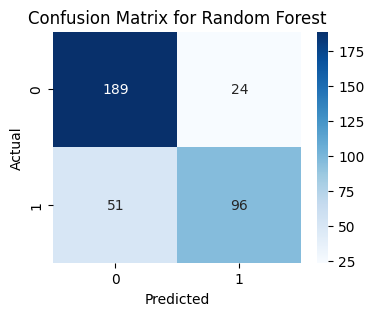

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       213
           1       0.71      0.65      0.68       147

    accuracy                           0.75       360
   macro avg       0.74      0.73      0.74       360
weighted avg       0.75      0.75      0.75       360



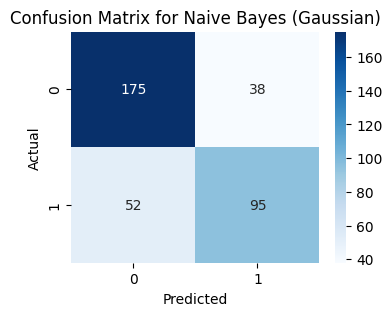

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.7444444444444445
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       213
           1       0.76      0.55      0.64       147

    accuracy                           0.74       360
   macro avg       0.75      0.71      0.72       360
weighted avg       0.75      0.74      0.74       360



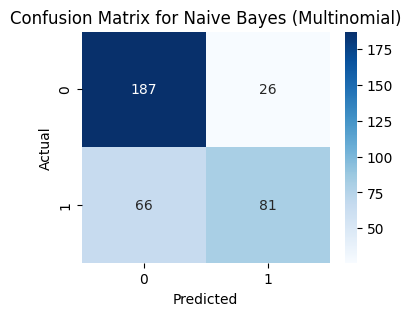

Evaluating SVM...
SVM Accuracy: 0.7972222222222223
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       213
           1       0.81      0.65      0.72       147

    accuracy                           0.80       360
   macro avg       0.80      0.77      0.78       360
weighted avg       0.80      0.80      0.79       360



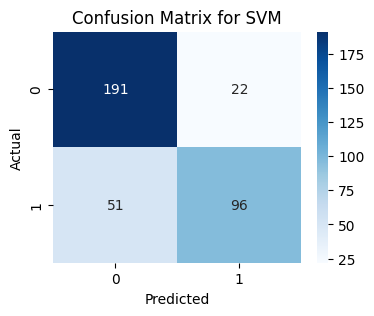

Evaluating KNN...
KNN Accuracy: 0.6333333333333333
              precision    recall  f1-score   support

           0       0.62      0.98      0.76       213
           1       0.83      0.13      0.22       147

    accuracy                           0.63       360
   macro avg       0.72      0.56      0.49       360
weighted avg       0.70      0.63      0.54       360



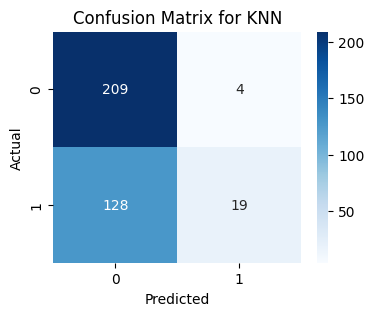

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       213
           1       0.80      0.67      0.73       147

    accuracy                           0.80       360
   macro avg       0.80      0.78      0.79       360
weighted avg       0.80      0.80      0.80       360



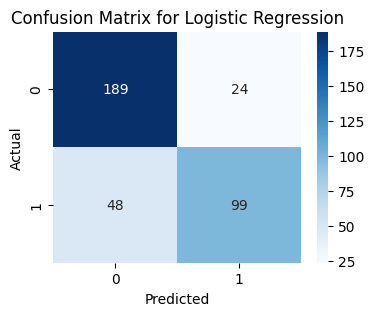

In [71]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_entertainment[["topic"]].copy()
eval_results["groundtruth"] = y_test_entertainment

# 資料準備
X_train_entertainment_dense = X_train_entertainment_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_entertainment_dense = X_test_entertainment_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_entertainment_dense, y_train_entertainment)
        predictions = model.predict(X_test_entertainment_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_entertainment_tf, y_train_entertainment)
        predictions = model.predict(X_test_entertainment_tf)
    else:
        model.fit(X_train_entertainment_tfidf, y_train_entertainment)
        predictions = model.predict(X_test_entertainment_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_entertainment, predictions)
    report = classification_report(y_test_entertainment, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_entertainment, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_entertainment, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [72]:
results_table_entertainment = calculate_metrics(eval_results, topic = "Entertainment")
display(results_table_entertainment)  # 使用 display 函式印出表格

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Entertainment,Random Forest,360,0.791667,0.719101,"[[189, 24], [51, 96]]"
1,Entertainment,Naive Bayes (Gaussian),360,0.750000,0.678571,"[[175, 38], [52, 95]]"
2,Entertainment,Naive Bayes (Multinomial),360,0.744444,0.637795,"[[187, 26], [66, 81]]"
3,Entertainment,SVM,360,0.797222,0.724528,"[[191, 22], [51, 96]]"
4,Entertainment,KNN,360,0.633333,0.223529,"[[209, 4], [128, 19]]"
5,Entertainment,Logistic Regression,360,0.800000,0.733333,"[[189, 24], [48, 99]]"


## 全部文章隨機抽 3699(2971+368+360) 筆




In [73]:
random_rows = df_filtered.sample(n=3699, random_state=42)  # random_state 確保結果可重現

In [74]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (combining validation and test)
X_train_3699, X_temp_3699, y_train_3699, y_temp_3699 = train_test_split(
    random_rows.drop('label', axis=1),  # Features (excluding the label column)
    random_rows['label'],  # Target variable (the label column)
    test_size=728,  # Size of the temporary set (validation + test)
    random_state=42,  # Set a random state for reproducibility
    stratify=random_rows['label'] # ensures the label proportions are maintained in each split
)

# Calculate the ratio of validation set within the temporary set
validation_ratio_temp = validation_ratio / (validation_ratio + test_ratio)

# Split the temporary set into validation and test sets
X_val_3699, X_test_3699, y_val_3699, y_test_3699 = train_test_split(
    X_temp_3699,
    y_temp_3699,
    test_size=360,
    random_state=42,
    stratify=y_temp_3699 # ensures the label proportions are maintained in each split
)

# Print the shapes of the resulting sets to verify the split
print(f"Training data shape: {X_train_3699.shape}, {y_train_3699.shape}")
print(f"Validation data shape: {X_val_3699.shape}, {y_val_3699.shape}")
print(f"Testing data shape: {X_test_3699.shape}, {y_test_3699.shape}")

Training data shape: (2971, 3), (2971,)
Validation data shape: (368, 3), (368,)
Testing data shape: (360, 3), (360,)


In [75]:
# prompt: do feature selection using chi-square
# Combine tokenized text into a single string for each document.
X_train_3699['combined_text'] = X_train_3699['tokenized_text'].apply(lambda x: ' '.join(x))

# Create a vectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_3699['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_3699)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

      feature   chi2_score        p_value
22162      wa  2699.216391   0.000000e+00
18134    said  2311.759543   0.000000e+00
20634     thi  1375.773350  3.863354e-301
10132      ha  1305.906152  5.884834e-286
15862   peopl  1263.489577  9.717076e-277
19690   state  1255.828134  4.492783e-275
10533      hi  1219.280193  3.937341e-267
21111   trump  1065.414440  1.086346e-233
22812    year  1013.897113  1.712203e-222
15206     one   892.794404  3.616078e-196
22687   would   891.360305  7.413045e-196
18292     say   784.648466  1.174360e-172
2362    abort   714.290075  2.334952e-157
12810    like   701.921957  1.142254e-154
20753    time   688.178942  1.112505e-151
21776  vaccin   673.335983  1.879882e-148
4861     call   669.762229  1.125417e-147
16507  presid   669.582207  1.231581e-147
10382  health   630.425025  4.040009e-139
9760       go   625.980715  3.740963e-138


In [76]:
# 確認最後要的size
size = 1500
vocabulary_3699 = chi2_results_sorted["feature"].tolist()[:size]
all_data_features_3699 = set(vocabulary_3699)

In [77]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_3699['featured_text'] = X_train_3699['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_3699])
)
X_val_3699['featured_text'] = X_val_3699['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_3699])
)
X_test_3699['featured_text'] = X_test_3699['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_3699])
)

In [78]:
# 將文章轉為tf-idf與tf vector

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_3699['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val_3699['featured_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test_3699['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_tf = tf_vectorizer.fit_transform(X_train_3699['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tf = tf_vectorizer.transform(X_val_3699['featured_text'])
X_test_tf = tf_vectorizer.transform(X_test_3699['featured_text'])


# Print shapes to verify
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_val_tfidf shape: {X_val_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

print(f"X_train_tf shape: {X_train_tf.shape}")
print(f"X_val_tf shape: {X_val_tf.shape}")
print(f"X_test_tf shape: {X_test_tf.shape}")

X_train_tfidf shape: (2971, 1491)
X_val_tfidf shape: (368, 1491)
X_test_tfidf shape: (360, 1491)
X_train_tf shape: (2971, 1491)
X_val_tf shape: (368, 1491)
X_test_tf shape: (360, 1491)


Evaluating Random Forest...
Random Forest Accuracy: 0.7277777777777777
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       198
           1       0.76      0.57      0.65       162

    accuracy                           0.73       360
   macro avg       0.74      0.71      0.72       360
weighted avg       0.73      0.73      0.72       360



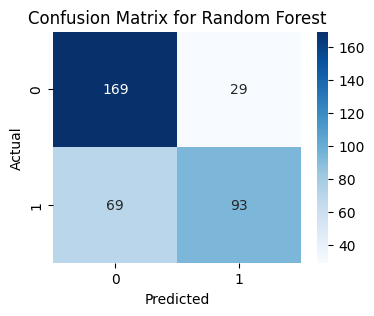

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.6722222222222223
              precision    recall  f1-score   support

           0       0.69      0.75      0.71       198
           1       0.65      0.58      0.61       162

    accuracy                           0.67       360
   macro avg       0.67      0.66      0.66       360
weighted avg       0.67      0.67      0.67       360



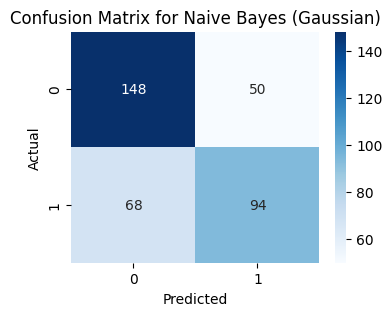

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.6583333333333333
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       198
           1       0.64      0.54      0.59       162

    accuracy                           0.66       360
   macro avg       0.66      0.65      0.65       360
weighted avg       0.66      0.66      0.65       360



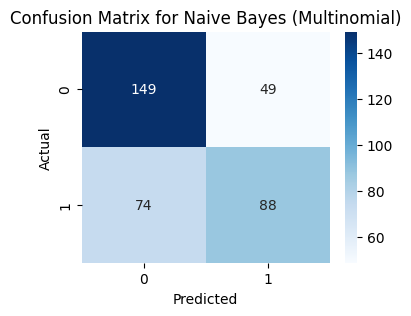

Evaluating SVM...
SVM Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       198
           1       0.79      0.56      0.65       162

    accuracy                           0.73       360
   macro avg       0.75      0.72      0.72       360
weighted avg       0.74      0.73      0.72       360



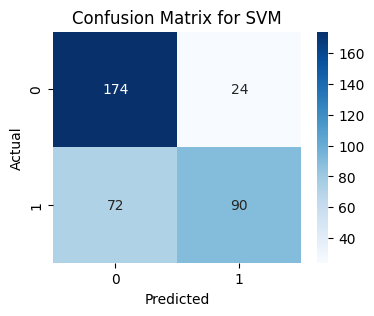

Evaluating KNN...
KNN Accuracy: 0.6027777777777777
              precision    recall  f1-score   support

           0       0.59      0.94      0.72       198
           1       0.73      0.19      0.30       162

    accuracy                           0.60       360
   macro avg       0.66      0.56      0.51       360
weighted avg       0.65      0.60      0.53       360



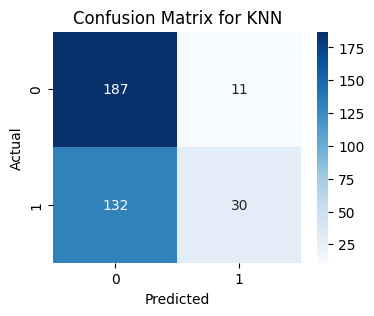

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       198
           1       0.74      0.59      0.66       162

    accuracy                           0.72       360
   macro avg       0.73      0.71      0.71       360
weighted avg       0.72      0.72      0.72       360



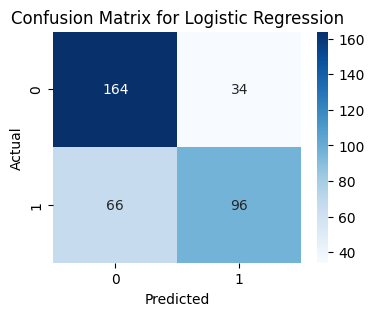

In [79]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_3699[["topic"]].copy()
eval_results["groundtruth"] = y_test_3699

# 資料準備
X_train_dense = X_train_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_dense = X_test_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_dense, y_train_3699)
        predictions = model.predict(X_test_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_tf, y_train_3699)
        predictions = model.predict(X_test_tf)
    else:
        model.fit(X_train_tfidf, y_train_3699)
        predictions = model.predict(X_test_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_3699, predictions)
    report = classification_report(y_test_3699, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_3699, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_3699, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_3699), yticklabels=np.unique(y_test_3699))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [80]:
eval_results

,topic,groundtruth,Random Forest,Naive Bayes (Gaussian),Naive Bayes (Multinomial),SVM,KNN,Logistic Regression
1376,Entertainment,1,1,1,0,1,0,1
11182,Society,0,0,0,0,0,0,0
3909,Society,1,1,1,1,1,0,1
5375,Society,1,1,1,1,0,1,1
581,Entertainment,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
14516,Entertainment,0,0,0,0,0,0,0
10548,Politics,0,1,1,0,1,0,1
11953,Entertainment,1,1,1,0,1,0,1
468,Politics,1,1,1,1,1,0,1


In [81]:
results_dict = {}
# 計算每個主題的結果並印出表格
for topic in eval_results['topic'].unique():
    results_table = calculate_metrics(eval_results, topic)
    display(results_table)  # 使用 display 函式印出表格
    results_dict[topic] = results_table  # 保存到字典

# 計算所有主題的結果並印出表格
all_results_table = calculate_metrics(eval_results)
display(all_results_table)

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Entertainment,Random Forest,80,0.7375,0.618182,"[[42, 4], [17, 17]]"
1,Entertainment,Naive Bayes (Gaussian),80,0.7250,0.576923,"[[43, 3], [19, 15]]"
2,Entertainment,Naive Bayes (Multinomial),80,0.7250,0.592593,"[[42, 4], [18, 16]]"
3,Entertainment,SVM,80,0.7875,0.690909,"[[44, 2], [15, 19]]"
4,Entertainment,KNN,80,0.6375,0.292683,"[[45, 1], [28, 6]]"
5,Entertainment,Logistic Regression,80,0.7750,0.666667,"[[44, 2], [16, 18]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Society,Random Forest,100,0.81,0.698413,"[[59, 7], [12, 22]]"
1,Society,Naive Bayes (Gaussian),100,0.67,0.547945,"[[47, 19], [14, 20]]"
2,Society,Naive Bayes (Multinomial),100,0.70,0.571429,"[[50, 16], [14, 20]]"
3,Society,SVM,100,0.78,0.620690,"[[60, 6], [16, 18]]"
4,Society,KNN,100,0.70,0.347826,"[[62, 4], [26, 8]]"
5,Society,Logistic Regression,100,0.78,0.666667,"[[56, 10], [12, 22]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Conflict,Random Forest,32,0.59375,0.580645,"[[10, 4], [9, 9]]"
1,Conflict,Naive Bayes (Gaussian),32,0.68750,0.705882,"[[10, 4], [6, 12]]"
2,Conflict,Naive Bayes (Multinomial),32,0.50000,0.529412,"[[7, 7], [9, 9]]"
3,Conflict,SVM,32,0.59375,0.551724,"[[11, 3], [10, 8]]"
4,Conflict,KNN,32,0.53125,0.285714,"[[14, 0], [15, 3]]"
5,Conflict,Logistic Regression,32,0.65625,0.645161,"[[11, 3], [8, 10]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Politics,Random Forest,114,0.710526,0.685714,"[[45, 9], [24, 36]]"
1,Politics,Naive Bayes (Gaussian),114,0.666667,0.666667,"[[38, 16], [22, 38]]"
2,Politics,Naive Bayes (Multinomial),114,0.614035,0.592593,"[[38, 16], [28, 32]]"
3,Politics,SVM,114,0.701754,0.673077,"[[45, 9], [25, 35]]"
4,Politics,KNN,114,0.552632,0.301370,"[[52, 2], [49, 11]]"
5,Politics,Logistic Regression,114,0.684211,0.672727,"[[41, 13], [23, 37]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Business,Random Forest,18,0.666667,0.625000,"[[7, 3], [3, 5]]"
1,Business,Naive Bayes (Gaussian),18,0.555556,0.555556,"[[5, 5], [3, 5]]"
2,Business,Naive Bayes (Multinomial),18,0.888889,0.875000,"[[9, 1], [1, 7]]"
3,Business,SVM,18,0.777778,0.750000,"[[8, 2], [2, 6]]"
4,Business,KNN,18,0.611111,0.363636,"[[9, 1], [6, 2]]"
5,Business,Logistic Regression,18,0.722222,0.666667,"[[8, 2], [3, 5]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Health,Random Forest,16,0.6250,0.571429,"[[6, 2], [4, 4]]"
1,Health,Naive Bayes (Gaussian),16,0.5625,0.533333,"[[5, 3], [4, 4]]"
2,Health,Naive Bayes (Multinomial),16,0.4375,0.470588,"[[3, 5], [4, 4]]"
3,Health,SVM,16,0.6250,0.571429,"[[6, 2], [4, 4]]"
4,Health,KNN,16,0.3125,0.000000,"[[5, 3], [8, 0]]"
5,Health,Logistic Regression,16,0.5000,0.500000,"[[4, 4], [4, 4]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,全部,Random Forest,360,0.727778,0.654930,"[[169, 29], [69, 93]]"
1,全部,Naive Bayes (Gaussian),360,0.672222,0.614379,"[[148, 50], [68, 94]]"
2,全部,Naive Bayes (Multinomial),360,0.658333,0.588629,"[[149, 49], [74, 88]]"
3,全部,SVM,360,0.733333,0.652174,"[[174, 24], [72, 90]]"
4,全部,KNN,360,0.602778,0.295567,"[[187, 11], [132, 30]]"
5,全部,Logistic Regression,360,0.722222,0.657534,"[[164, 34], [66, 96]]"


# d. 類別-Health
前 20 大 Features 中有較多貼合健康主題的 Features，和其他主題較不同。測試樣本數較低，混淆矩陣的情況也沒有一致的 pattern。評估指標也不見得是不分類優於分類後 (RF、SVM)。模型之間 KNN 指標表現最差，尤其 F1。


## feature selection

In [82]:
# Create a vectorizer to convert text data to numerical features

# 篩選 topic 欄位等於 'Health' 的資料
Xy_train = pd.concat([X_train, y_train], axis=1)
X_train_health = Xy_train[Xy_train['topic'] == 'Health'].drop(columns=['label', 'featured_text'])
y_train_health = Xy_train[Xy_train['topic'] == 'Health']['label']

Xy_val = pd.concat([X_val, y_val], axis=1)
X_val_health = Xy_val[Xy_val['topic'] == 'Health'].drop(columns=['label', 'featured_text'])
y_val_health = Xy_val[Xy_val['topic'] == 'Health']['label']

Xy_test = pd.concat([X_test, y_test], axis=1)
X_test_health = Xy_test[Xy_test['topic'] == 'Health'].drop(columns=['label', 'featured_text'])
y_test_health = Xy_test[Xy_test['topic'] == 'Health']['label']



vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_health['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_health)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

      feature  chi2_score        p_value
9512   vaccin  754.363203  4.515312e-166
1291    abort  549.476247  1.636544e-121
9701       wa  525.934720  2.164607e-116
9045      thi  511.708840  2.694147e-113
7742   report  465.867855  2.540751e-103
9964     year  446.992426   3.255755e-99
8594    state  426.239923   1.069736e-94
4127  fluorid  424.925926   2.066688e-94
6976    peopl  422.413065   7.281447e-94
4114      flu  403.419999   9.918632e-90
3109    death  358.792424   5.158594e-80
5060   infect  357.784302   8.551648e-80
9490      use  353.216323   8.447898e-79
7997     said  347.994211   1.158596e-77
1429      age  343.120407   1.334475e-76
4546       ha  330.555819   7.273269e-74
4640   health  305.021699   2.653029e-68
9744    water  269.106911   1.776459e-60
1549    among  262.691699   4.444280e-59
7010   person  245.633962   2.324386e-55


In [83]:
# 確認最後要的size
size = 1500
vocabulary = chi2_results_sorted["feature"].tolist()[:size]
health_features = set(vocabulary)

In [84]:
X_train_health.head()

,text,topic,tokenized_text,combined_text
13612,Legionnaires Disease and Pontiac FeverWhat is ...,Health,"[legionnair, diseas, pontiac, feverwhat, legio...",legionnair diseas pontiac feverwhat legionnair...
12606,\nDeceased bodies can get goosebumps.,Health,"[deceas, bodi, get, goosebump]",deceas bodi get goosebump
12875,"\nA newspaper clipping from 1918 documents a ""...",Health,"[newspap, clip, 1918, document, ``, public, no...",newspap clip 1918 document `` public notic '' ...
15941,\nRush Limbaugh was a smoker.,Health,"[rush, limbaugh, wa, smoker]",rush limbaugh wa smoker
4285,\n I had my right ball removed yesterday due t...,Health,"[right, ball, remov, yesterday, due, probabl, ...",right ball remov yesterday due probabl testicu...


In [85]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_health['featured_text'] = X_train_health['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_val_health['featured_text'] = X_val_health['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_test_health['featured_text'] = X_test_health['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)

## vectorize

In [86]:
# 將文章轉為tf-idf與tf vector
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_health_tfidf = tfidf_vectorizer.fit_transform(X_train_health['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_health_tfidf = tfidf_vectorizer.transform(X_val_health['featured_text'])
X_test_health_tfidf = tfidf_vectorizer.transform(X_test_health['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_health_tf = tf_vectorizer.fit_transform(X_train_health['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_health_tf = tf_vectorizer.transform(X_val_health['featured_text'])
X_test_health_tf = tf_vectorizer.transform(X_test_health['featured_text'])


# Print shapes to verify
print(f"X_train_health_tfidf shape: {X_train_health_tfidf.shape}")
print(f"X_val_health_tfidf shape: {X_val_health_tfidf.shape}")
print(f"X_test_health_tfidf shape: {X_test_health_tfidf.shape}")

print(f"X_train_health_tf shape: {X_train_health_tf.shape}")
print(f"X_val_health_tf shape: {X_val_health_tf.shape}")
print(f"X_test_health_tf shape: {X_test_health_tf.shape}")

X_train_health_tfidf shape: (555, 1476)
X_val_health_tfidf shape: (70, 1476)
X_test_health_tfidf shape: (85, 1476)
X_train_health_tf shape: (555, 1476)
X_val_health_tf shape: (70, 1476)
X_test_health_tf shape: (85, 1476)


## 訓練模型 + 評估模型

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Evaluating Random Forest...
Random Forest Accuracy: 0.7294117647058823
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        43
           1       0.79      0.62      0.69        42

    accuracy                           0.73        85
   macro avg       0.74      0.73      0.73        85
weighted avg       0.74      0.73      0.73        85



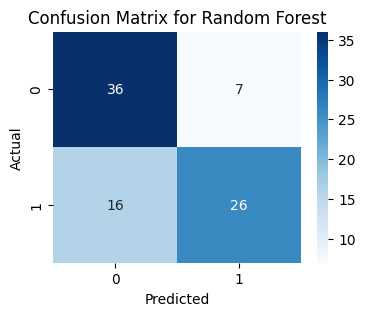

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.5764705882352941
              precision    recall  f1-score   support

           0       0.73      0.26      0.38        43
           1       0.54      0.90      0.68        42

    accuracy                           0.58        85
   macro avg       0.64      0.58      0.53        85
weighted avg       0.64      0.58      0.53        85



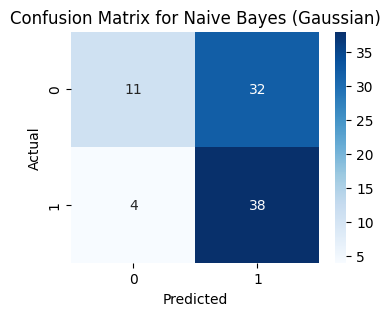

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.611764705882353
              precision    recall  f1-score   support

           0       0.61      0.65      0.63        43
           1       0.62      0.57      0.59        42

    accuracy                           0.61        85
   macro avg       0.61      0.61      0.61        85
weighted avg       0.61      0.61      0.61        85



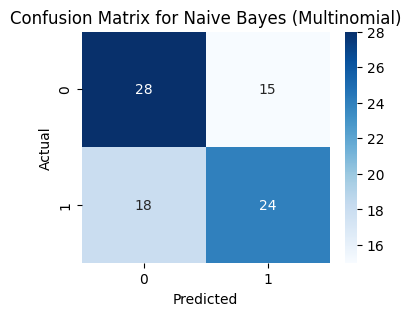

Evaluating SVM...
SVM Accuracy: 0.7764705882352941
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        43
           1       0.73      0.86      0.79        42

    accuracy                           0.78        85
   macro avg       0.78      0.78      0.78        85
weighted avg       0.78      0.78      0.78        85



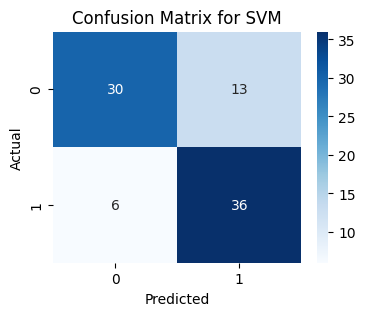

Evaluating KNN...
KNN Accuracy: 0.5294117647058824
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        43
           1       1.00      0.05      0.09        42

    accuracy                           0.53        85
   macro avg       0.76      0.52      0.39        85
weighted avg       0.76      0.53      0.39        85



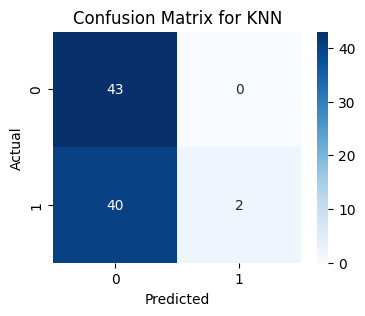

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7058823529411765
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        43
           1       0.66      0.83      0.74        42

    accuracy                           0.71        85
   macro avg       0.72      0.71      0.70        85
weighted avg       0.72      0.71      0.70        85



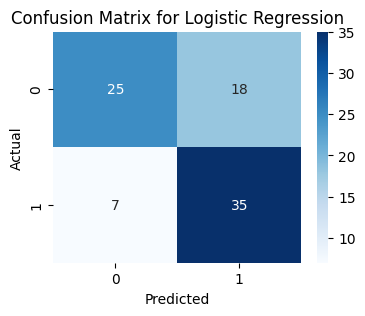

In [88]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_health[["topic"]].copy()
eval_results["groundtruth"] = y_test_health

# 資料準備
X_train_health_dense = X_train_health_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_health_dense = X_test_health_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_health_dense, y_train_health)
        predictions = model.predict(X_test_health_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_health_tf, y_train_health)
        predictions = model.predict(X_test_health_tf)
    else:
        model.fit(X_train_health_tfidf, y_train_health)
        predictions = model.predict(X_test_health_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_health, predictions)
    report = classification_report(y_test_health, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_health, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_health, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [89]:
results_table_health = calculate_metrics(eval_results, topic = "Health")
display(results_table_health)  # 使用 display 函式印出表格

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Health,Random Forest,85,0.729412,0.693333,"[[36, 7], [16, 26]]"
1,Health,Naive Bayes (Gaussian),85,0.576471,0.678571,"[[11, 32], [4, 38]]"
2,Health,Naive Bayes (Multinomial),85,0.611765,0.592593,"[[28, 15], [18, 24]]"
3,Health,SVM,85,0.776471,0.791209,"[[30, 13], [6, 36]]"
4,Health,KNN,85,0.529412,0.090909,"[[43, 0], [40, 2]]"
5,Health,Logistic Regression,85,0.705882,0.736842,"[[25, 18], [7, 35]]"


## 全部文章隨機抽 710(555+70+85) 筆




In [90]:
random_rows = df_filtered.sample(n=710, random_state=42)  # random_state 確保結果可重現

In [91]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (combining validation and test)
X_train_710, X_temp_710, y_train_710, y_temp_710 = train_test_split(
    random_rows.drop('label', axis=1),  # Features (excluding the label column)
    random_rows['label'],  # Target variable (the label column)
    test_size=155,  # Size of the temporary set (validation + test)
    random_state=42,  # Set a random state for reproducibility
    stratify=random_rows['label'] # ensures the label proportions are maintained in each split
)

# Calculate the ratio of validation set within the temporary set
validation_ratio_temp = validation_ratio / (validation_ratio + test_ratio)

# Split the temporary set into validation and test sets
X_val_710, X_test_710, y_val_710, y_test_710 = train_test_split(
    X_temp_710,
    y_temp_710,
    test_size=85,
    random_state=42,
    stratify=y_temp_710 # ensures the label proportions are maintained in each split
)

# Print the shapes of the resulting sets to verify the split
print(f"Training data shape: {X_train_710.shape}, {y_train_710.shape}")
print(f"Validation data shape: {X_val_710.shape}, {y_val_710.shape}")
print(f"Testing data shape: {X_test_710.shape}, {y_test_710.shape}")

Training data shape: (555, 3), (555,)
Validation data shape: (70, 3), (70,)
Testing data shape: (85, 3), (85,)


In [92]:
# prompt: do feature selection using chi-square
# Combine tokenized text into a single string for each document.
X_train_710['combined_text'] = X_train_710['tokenized_text'].apply(lambda x: ' '.join(x))

# Create a vectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_710['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_710)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

       feature  chi2_score       p_value
7677      said  428.909585  2.806839e-95
9213        wa  332.598819  2.610765e-74
516       2015  235.898896  3.082909e-53
4629        ha  232.582390  1.629971e-52
8260     state  228.207574  1.466383e-51
4722    health  181.496977  2.283373e-41
6764     peopl  168.363397  1.685104e-38
9471      year  166.239869  4.903082e-38
8643       thi  165.638126  6.636123e-38
4780        hi  155.977218  8.563395e-36
6508       one  138.894678  4.644390e-32
7748    school  131.001129  2.474654e-30
9084    vaccin  123.994849  8.446257e-29
6791    person  117.089069  2.744609e-27
2707  children  116.195496  4.306789e-27
5523       law  109.639719  1.175220e-25
515       2014  109.392001  1.331658e-25
1575  advertis  108.662657  1.923955e-25
1187      4808  106.285714  6.383499e-25
7161    public  104.282935  1.753932e-24


In [93]:
# 確認最後要的size
size = 1500
vocabulary_710 = chi2_results_sorted["feature"].tolist()[:size]
all_data_features_710 = set(vocabulary_710)

In [94]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_710['featured_text'] = X_train_710['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_710])
)
X_val_710['featured_text'] = X_val_710['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_710])
)
X_test_710['featured_text'] = X_test_710['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_710])
)

In [95]:
# 將文章轉為tf-idf與tf vector

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_710['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val_710['featured_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test_710['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_tf = tf_vectorizer.fit_transform(X_train_710['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tf = tf_vectorizer.transform(X_val_710['featured_text'])
X_test_tf = tf_vectorizer.transform(X_test_710['featured_text'])


# Print shapes to verify
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_val_tfidf shape: {X_val_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

print(f"X_train_tf shape: {X_train_tf.shape}")
print(f"X_val_tf shape: {X_val_tf.shape}")
print(f"X_test_tf shape: {X_test_tf.shape}")

X_train_tfidf shape: (555, 1483)
X_val_tfidf shape: (70, 1483)
X_test_tfidf shape: (85, 1483)
X_train_tf shape: (555, 1483)
X_val_tf shape: (70, 1483)
X_test_tf shape: (85, 1483)


Evaluating Random Forest...
Random Forest Accuracy: 0.7294117647058823
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        47
           1       0.73      0.63      0.68        38

    accuracy                           0.73        85
   macro avg       0.73      0.72      0.72        85
weighted avg       0.73      0.73      0.73        85



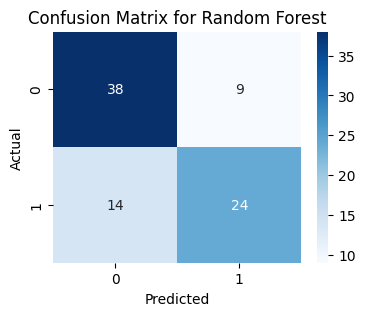

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.6470588235294118
              precision    recall  f1-score   support

           0       0.77      0.51      0.62        47
           1       0.57      0.82      0.67        38

    accuracy                           0.65        85
   macro avg       0.67      0.66      0.64        85
weighted avg       0.68      0.65      0.64        85



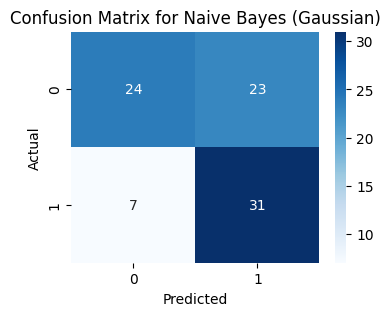

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.7176470588235294
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        47
           1       0.75      0.55      0.64        38

    accuracy                           0.72        85
   macro avg       0.73      0.70      0.70        85
weighted avg       0.72      0.72      0.71        85



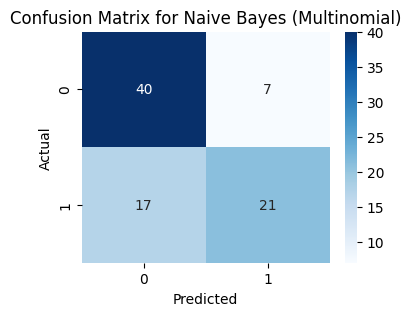

Evaluating SVM...
SVM Accuracy: 0.7176470588235294
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        47
           1       0.72      0.61      0.66        38

    accuracy                           0.72        85
   macro avg       0.72      0.71      0.71        85
weighted avg       0.72      0.72      0.71        85



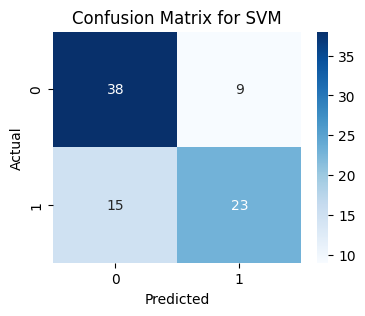

Evaluating KNN...
KNN Accuracy: 0.5764705882352941
              precision    recall  f1-score   support

           0       0.57      0.96      0.71        47
           1       0.67      0.11      0.18        38

    accuracy                           0.58        85
   macro avg       0.62      0.53      0.45        85
weighted avg       0.61      0.58      0.48        85



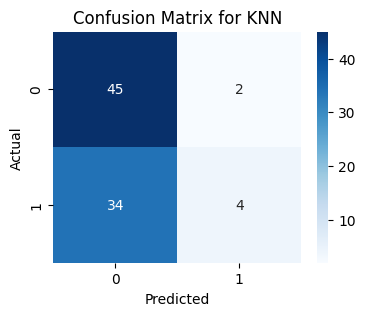

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7058823529411765
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        47
           1       0.72      0.55      0.63        38

    accuracy                           0.71        85
   macro avg       0.71      0.69      0.69        85
weighted avg       0.71      0.71      0.70        85



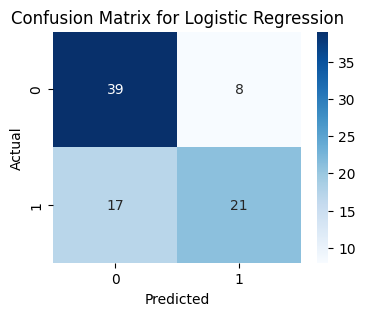

In [96]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_710[["topic"]].copy()
eval_results["groundtruth"] = y_test_710

# 資料準備
X_train_dense = X_train_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_dense = X_test_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_dense, y_train_710)
        predictions = model.predict(X_test_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_tf, y_train_710)
        predictions = model.predict(X_test_tf)
    else:
        model.fit(X_train_tfidf, y_train_710)
        predictions = model.predict(X_test_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_710, predictions)
    report = classification_report(y_test_710, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_710, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_710, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_710), yticklabels=np.unique(y_test_710))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [97]:
eval_results

,topic,groundtruth,Random Forest,Naive Bayes (Gaussian),Naive Bayes (Multinomial),SVM,KNN,Logistic Regression
11405,Society,0,0,0,0,0,0,0
11262,Entertainment,0,0,0,0,0,0,0
6257,Conflict,0,1,1,1,0,0,0
412,Health,1,1,1,1,1,0,1
3236,Entertainment,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
7332,Society,1,0,1,1,0,0,0
6247,Conflict,1,0,0,0,0,0,0
15968,Society,1,0,1,1,0,0,0
4278,Entertainment,0,0,1,1,0,0,0


In [98]:
results_dict = {}
# 計算每個主題的結果並印出表格
for topic in eval_results['topic'].unique():
    results_table = calculate_metrics(eval_results, topic)
    display(results_table)  # 使用 display 函式印出表格
    results_dict[topic] = results_table  # 保存到字典

# 計算所有主題的結果並印出表格
all_results_table = calculate_metrics(eval_results)
display(all_results_table)

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Society,Random Forest,22,0.772727,0.615385,"[[13, 1], [4, 4]]"
1,Society,Naive Bayes (Gaussian),22,0.636364,0.600000,"[[8, 6], [2, 6]]"
2,Society,Naive Bayes (Multinomial),22,0.818182,0.714286,"[[13, 1], [3, 5]]"
3,Society,SVM,22,0.772727,0.615385,"[[13, 1], [4, 4]]"
4,Society,KNN,22,0.681818,0.222222,"[[14, 0], [7, 1]]"
5,Society,Logistic Regression,22,0.772727,0.615385,"[[13, 1], [4, 4]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Entertainment,Random Forest,18,0.833333,0.769231,"[[10, 1], [2, 5]]"
1,Entertainment,Naive Bayes (Gaussian),18,0.722222,0.705882,"[[7, 4], [1, 6]]"
2,Entertainment,Naive Bayes (Multinomial),18,0.666667,0.400000,"[[10, 1], [5, 2]]"
3,Entertainment,SVM,18,0.833333,0.769231,"[[10, 1], [2, 5]]"
4,Entertainment,KNN,18,0.555556,0.000000,"[[10, 1], [7, 0]]"
5,Entertainment,Logistic Regression,18,0.777778,0.600000,"[[11, 0], [4, 3]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Conflict,Random Forest,13,0.461538,0.363636,"[[4, 3], [4, 2]]"
1,Conflict,Naive Bayes (Gaussian),13,0.461538,0.461538,"[[3, 4], [3, 3]]"
2,Conflict,Naive Bayes (Multinomial),13,0.461538,0.222222,"[[5, 2], [5, 1]]"
3,Conflict,SVM,13,0.461538,0.222222,"[[5, 2], [5, 1]]"
4,Conflict,KNN,13,0.538462,0.250000,"[[6, 1], [5, 1]]"
5,Conflict,Logistic Regression,13,0.461538,0.222222,"[[5, 2], [5, 1]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Health,Random Forest,4,0.50,0.666667,"[[0, 1], [1, 2]]"
1,Health,Naive Bayes (Gaussian),4,0.75,0.857143,"[[0, 1], [0, 3]]"
2,Health,Naive Bayes (Multinomial),4,1.00,1.000000,"[[1, 0], [0, 3]]"
3,Health,SVM,4,0.50,0.666667,"[[0, 1], [1, 2]]"
4,Health,KNN,4,0.25,0.000000,"[[1, 0], [3, 0]]"
5,Health,Logistic Regression,4,0.50,0.666667,"[[0, 1], [1, 2]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Politics,Random Forest,23,0.782609,0.761905,"[[10, 3], [2, 8]]"
1,Politics,Naive Bayes (Gaussian),23,0.652174,0.692308,"[[6, 7], [1, 9]]"
2,Politics,Naive Bayes (Multinomial),23,0.739130,0.666667,"[[11, 2], [4, 6]]"
3,Politics,SVM,23,0.739130,0.727273,"[[9, 4], [2, 8]]"
4,Politics,KNN,23,0.652174,0.333333,"[[13, 0], [8, 2]]"
5,Politics,Logistic Regression,23,0.695652,0.666667,"[[9, 4], [3, 7]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Business,Random Forest,5,0.8,0.857143,"[[1, 0], [1, 3]]"
1,Business,Naive Bayes (Gaussian),5,0.8,0.888889,"[[0, 1], [0, 4]]"
2,Business,Naive Bayes (Multinomial),5,0.8,0.888889,"[[0, 1], [0, 4]]"
3,Business,SVM,5,0.8,0.857143,"[[1, 0], [1, 3]]"
4,Business,KNN,5,0.2,0.000000,"[[1, 0], [4, 0]]"
5,Business,Logistic Regression,5,1.0,1.000000,"[[1, 0], [0, 4]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,全部,Random Forest,85,0.729412,0.676056,"[[38, 9], [14, 24]]"
1,全部,Naive Bayes (Gaussian),85,0.647059,0.673913,"[[24, 23], [7, 31]]"
2,全部,Naive Bayes (Multinomial),85,0.717647,0.636364,"[[40, 7], [17, 21]]"
3,全部,SVM,85,0.717647,0.657143,"[[38, 9], [15, 23]]"
4,全部,KNN,85,0.576471,0.181818,"[[45, 2], [34, 4]]"
5,全部,Logistic Regression,85,0.705882,0.626866,"[[39, 8], [17, 21]]"


# e. 類別-Politics

## feature selection

In [99]:
# Create a vectorizer to convert text data to numerical features

# 篩選 topic 欄位等於 'Politics' 的資料
Xy_train = pd.concat([X_train, y_train], axis=1)
X_train_politics = Xy_train[Xy_train['topic'] == 'Politics'].drop(columns=['label', 'featured_text'])
y_train_politics = Xy_train[Xy_train['topic'] == 'Politics']['label']

Xy_val = pd.concat([X_val, y_val], axis=1)
X_val_politics = Xy_val[Xy_val['topic'] == 'Politics'].drop(columns=['label', 'featured_text'])
y_val_politics = Xy_val[Xy_val['topic'] == 'Politics']['label']

Xy_test = pd.concat([X_test, y_test], axis=1)
X_test_politics = Xy_test[Xy_test['topic'] == 'Politics'].drop(columns=['label', 'featured_text'])
y_test_politics = Xy_test[Xy_test['topic'] == 'Politics']['label']



vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_politics['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_politics)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

      feature   chi2_score        p_value
26810      wa  2693.584696   0.000000e+00
21892    said  2652.449887   0.000000e+00
25542   trump  1966.718430   0.000000e+00
23752   state  1918.805813   0.000000e+00
12514      hi  1880.396416   0.000000e+00
2595    abort  1721.344903   0.000000e+00
12017      ha  1394.655877  3.045931e-305
24952     thi  1367.071784  3.005116e-299
21098  report  1347.632469  5.036864e-295
27669    year  1150.802193  3.002908e-252
26756    vote   999.111402  2.801658e-219
26360  vaccin   945.052534  1.578351e-207
19857  presid   943.220944  3.947741e-207
17166      mr   921.512344  2.067076e-202
19081   peopl   920.852106  2.876607e-202
18264     one   897.190548  4.004634e-197
12842    hous   894.075410  1.904409e-196
9395    elect   882.210971  7.227444e-194
12335  health   855.358487  4.973067e-188
27498   would   809.816905  3.960093e-178


In [100]:
# 確認最後要的size
size = 1500
vocabulary = chi2_results_sorted["feature"].tolist()[:size]
politics_features = set(vocabulary)

In [101]:
X_train_politics.head()

,text,topic,tokenized_text,combined_text
9362,\nDemocratic senators “sent a letter to the pr...,Politics,"[democrat, senat, “, sent, letter, prosecutor,...",democrat senat “ sent letter prosecutor ukrain...
9385,\nU.S. Sen. Bernie Sanders called businessman ...,Politics,"[u.s., sen., berni, sander, call, businessman,...",u.s. sen. berni sander call businessman robert...
14701,PsBattle: Kim Jong-un Holding Hands With North...,Politics,"[psbattl, kim, jong-un, hold, hand, north, kor...",psbattl kim jong-un hold hand north korea 's n...
8872,\nGOP congressional candidate DeAnna Lorraine ...,Politics,"[gop, congression, candid, deanna, lorrain, tw...",gop congression candid deanna lorrain tweet pr...
5939,\nNew Jersey passed a bill to keep President T...,Politics,"[new, jersey, pass, bill, keep, presid, trump,...",new jersey pass bill keep presid trump 2020 ba...


In [102]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_politics['featured_text'] = X_train_politics['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_val_politics['featured_text'] = X_val_politics['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_test_politics['featured_text'] = X_test_politics['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)

## vectorize

In [103]:
# 將文章轉為tf-idf與tf vector
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_politics_tfidf = tfidf_vectorizer.fit_transform(X_train_politics['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_politics_tfidf = tfidf_vectorizer.transform(X_val_politics['featured_text'])
X_test_politics_tfidf = tfidf_vectorizer.transform(X_test_politics['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_politics_tf = tf_vectorizer.fit_transform(X_train_politics['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_politics_tf = tf_vectorizer.transform(X_val_politics['featured_text'])
X_test_politics_tf = tf_vectorizer.transform(X_test_politics['featured_text'])


# Print shapes to verify
print(f"X_train_politics_tfidf shape: {X_train_politics_tfidf.shape}")
print(f"X_val_politics_tfidf shape: {X_val_politics_tfidf.shape}")
print(f"X_test_politics_tfidf shape: {X_test_politics_tfidf.shape}")

print(f"X_train_politics_tf shape: {X_train_politics_tf.shape}")
print(f"X_val_politics_tf shape: {X_val_politics_tf.shape}")
print(f"X_test_politics_tf shape: {X_test_politics_tf.shape}")

X_train_politics_tfidf shape: (4575, 1485)
X_val_politics_tfidf shape: (585, 1485)
X_test_politics_tfidf shape: (567, 1485)
X_train_politics_tf shape: (4575, 1485)
X_val_politics_tf shape: (585, 1485)
X_test_politics_tf shape: (567, 1485)


## 訓練模型 + 評估模型

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Evaluating Random Forest...
Random Forest Accuracy: 0.7389770723104057
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       290
           1       0.77      0.67      0.71       277

    accuracy                           0.74       567
   macro avg       0.74      0.74      0.74       567
weighted avg       0.74      0.74      0.74       567



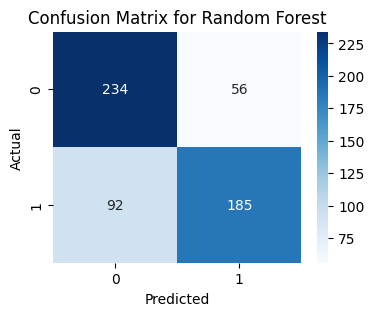

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.6878306878306878
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       290
           1       0.74      0.56      0.64       277

    accuracy                           0.69       567
   macro avg       0.70      0.68      0.68       567
weighted avg       0.70      0.69      0.68       567



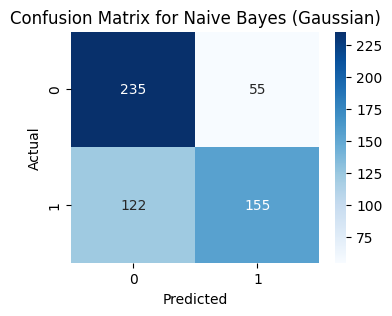

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.582010582010582
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       290
           1       0.60      0.43      0.50       277

    accuracy                           0.58       567
   macro avg       0.59      0.58      0.57       567
weighted avg       0.59      0.58      0.57       567



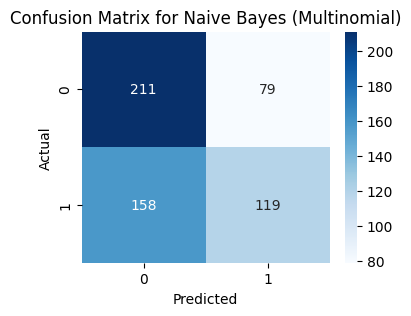

Evaluating SVM...
SVM Accuracy: 0.7354497354497355
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       290
           1       0.77      0.65      0.71       277

    accuracy                           0.74       567
   macro avg       0.74      0.73      0.73       567
weighted avg       0.74      0.74      0.73       567



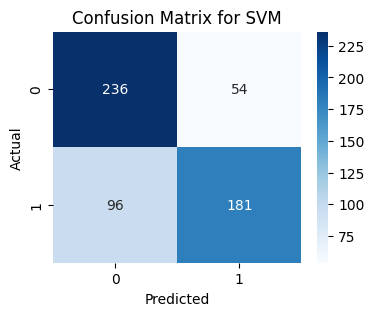

Evaluating KNN...
KNN Accuracy: 0.6084656084656085
              precision    recall  f1-score   support

           0       0.60      0.72      0.65       290
           1       0.63      0.49      0.55       277

    accuracy                           0.61       567
   macro avg       0.61      0.61      0.60       567
weighted avg       0.61      0.61      0.60       567



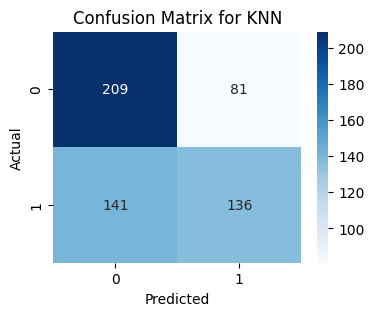

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7266313932980599
              precision    recall  f1-score   support

           0       0.71      0.78      0.75       290
           1       0.75      0.67      0.70       277

    accuracy                           0.73       567
   macro avg       0.73      0.73      0.73       567
weighted avg       0.73      0.73      0.73       567



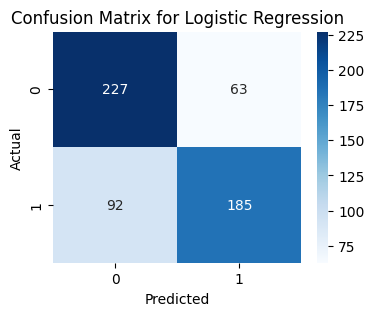

In [105]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_politics[["topic"]].copy()
eval_results["groundtruth"] = y_test_politics

# 資料準備
X_train_politics_dense = X_train_politics_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_politics_dense = X_test_politics_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_politics_dense, y_train_politics)
        predictions = model.predict(X_test_politics_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_politics_tf, y_train_politics)
        predictions = model.predict(X_test_politics_tf)
    else:
        model.fit(X_train_politics_tfidf, y_train_politics)
        predictions = model.predict(X_test_politics_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_politics, predictions)
    report = classification_report(y_test_politics, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_politics, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_politics, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [106]:
results_table_politics = calculate_metrics(eval_results, topic = "Politics")
display(results_table_politics)  # 使用 display 函式印出表格

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Politics,Random Forest,567,0.738977,0.714286,"[[234, 56], [92, 185]]"
1,Politics,Naive Bayes (Gaussian),567,0.687831,0.636550,"[[235, 55], [122, 155]]"
2,Politics,Naive Bayes (Multinomial),567,0.582011,0.501053,"[[211, 79], [158, 119]]"
3,Politics,SVM,567,0.735450,0.707031,"[[236, 54], [96, 181]]"
4,Politics,KNN,567,0.608466,0.550607,"[[209, 81], [141, 136]]"
5,Politics,Logistic Regression,567,0.726631,0.704762,"[[227, 63], [92, 185]]"


## 全部文章隨機抽 5727(4575+585+567) 筆




In [107]:
random_rows = df_filtered.sample(n=5727, random_state=42)  # random_state 確保結果可重現

In [108]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (combining validation and test)
X_train_5727, X_temp_5727, y_train_5727, y_temp_5727 = train_test_split(
    random_rows.drop('label', axis=1),  # Features (excluding the label column)
    random_rows['label'],  # Target variable (the label column)
    test_size=1152,  # Size of the temporary set (validation + test)
    random_state=42,  # Set a random state for reproducibility
    stratify=random_rows['label'] # ensures the label proportions are maintained in each split
)

# Calculate the ratio of validation set within the temporary set
validation_ratio_temp = validation_ratio / (validation_ratio + test_ratio)

# Split the temporary set into validation and test sets
X_val_5727, X_test_5727, y_val_5727, y_test_5727 = train_test_split(
    X_temp_5727,
    y_temp_5727,
    test_size=567,
    random_state=42,
    stratify=y_temp_5727 # ensures the label proportions are maintained in each split
)

# Print the shapes of the resulting sets to verify the split
print(f"Training data shape: {X_train_5727.shape}, {y_train_5727.shape}")
print(f"Validation data shape: {X_val_5727.shape}, {y_val_5727.shape}")
print(f"Testing data shape: {X_test_5727.shape}, {y_test_5727.shape}")

Training data shape: (4575, 3), (4575,)
Validation data shape: (585, 3), (585,)
Testing data shape: (567, 3), (567,)


In [109]:
# prompt: do feature selection using chi-square
# Combine tokenized text into a single string for each document.
X_train_5727['combined_text'] = X_train_5727['tokenized_text'].apply(lambda x: ' '.join(x))

# Create a vectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_5727['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_5727)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

      feature   chi2_score        p_value
26730      wa  3857.744376   0.000000e+00
21833    said  3319.977515   0.000000e+00
12475      hi  2186.693401   0.000000e+00
11986      ha  1878.106650   0.000000e+00
24854     thi  1867.244163   0.000000e+00
23725   state  1826.315487   0.000000e+00
19085   peopl  1518.462909   0.000000e+00
25446   trump  1457.932396   0.000000e+00
27592    year  1300.401937  9.244324e-285
18308     one  1166.519532  1.152457e-255
19879  presid  1132.612023  2.697373e-248
27396   would  1059.699744  1.896986e-232
24992    time  1020.501703  6.280288e-224
21060  report   974.813779  5.356886e-214
5581     call   966.177106  4.038968e-212
26260  vaccin   956.967151  4.057535e-210
17635     new   949.504329  1.700162e-208
22036     say   948.520285  2.782257e-208
3092     also   871.130536  1.852716e-191
15309    like   862.719603  1.248308e-189


In [110]:
# 確認最後要的size
size = 1500
vocabulary_5727 = chi2_results_sorted["feature"].tolist()[:size]
all_data_features_5727 = set(vocabulary_5727)

In [111]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_5727['featured_text'] = X_train_5727['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_5727])
)
X_val_5727['featured_text'] = X_val_5727['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_5727])
)
X_test_5727['featured_text'] = X_test_5727['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_5727])
)

In [112]:
# 將文章轉為tf-idf與tf vector

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_5727['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val_5727['featured_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test_5727['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_tf = tf_vectorizer.fit_transform(X_train_5727['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tf = tf_vectorizer.transform(X_val_5727['featured_text'])
X_test_tf = tf_vectorizer.transform(X_test_5727['featured_text'])


# Print shapes to verify
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_val_tfidf shape: {X_val_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

print(f"X_train_tf shape: {X_train_tf.shape}")
print(f"X_val_tf shape: {X_val_tf.shape}")
print(f"X_test_tf shape: {X_test_tf.shape}")

X_train_tfidf shape: (4575, 1494)
X_val_tfidf shape: (585, 1494)
X_test_tfidf shape: (567, 1494)
X_train_tf shape: (4575, 1494)
X_val_tf shape: (585, 1494)
X_test_tf shape: (567, 1494)


Evaluating Random Forest...
Random Forest Accuracy: 0.7530864197530864
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       314
           1       0.76      0.66      0.70       253

    accuracy                           0.75       567
   macro avg       0.75      0.74      0.75       567
weighted avg       0.75      0.75      0.75       567



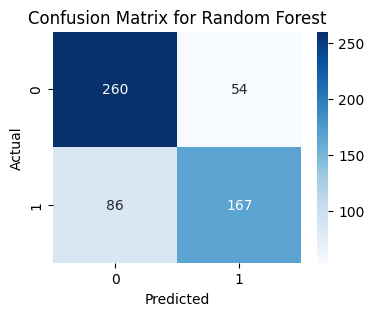

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.708994708994709
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       314
           1       0.72      0.57      0.64       253

    accuracy                           0.71       567
   macro avg       0.71      0.70      0.70       567
weighted avg       0.71      0.71      0.70       567



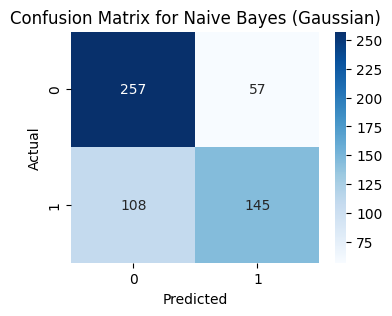

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.6278659611992945
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       314
           1       0.60      0.49      0.54       253

    accuracy                           0.63       567
   macro avg       0.62      0.61      0.61       567
weighted avg       0.62      0.63      0.62       567



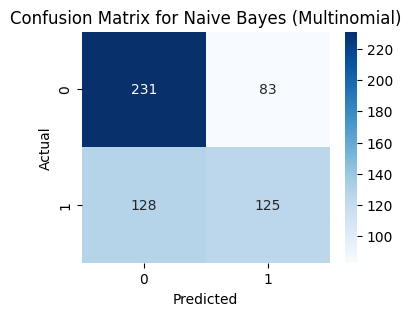

Evaluating SVM...
SVM Accuracy: 0.7372134038800705
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       314
           1       0.78      0.57      0.66       253

    accuracy                           0.74       567
   macro avg       0.75      0.72      0.72       567
weighted avg       0.75      0.74      0.73       567



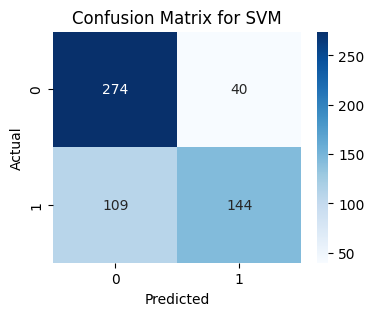

Evaluating KNN...
KNN Accuracy: 0.582010582010582
              precision    recall  f1-score   support

           0       0.57      0.94      0.71       314
           1       0.65      0.13      0.22       253

    accuracy                           0.58       567
   macro avg       0.61      0.54      0.47       567
weighted avg       0.61      0.58      0.49       567



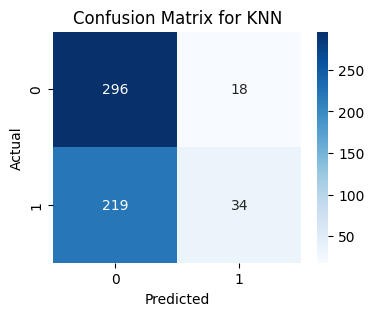

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7319223985890653
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       314
           1       0.75      0.60      0.67       253

    accuracy                           0.73       567
   macro avg       0.74      0.72      0.72       567
weighted avg       0.73      0.73      0.73       567



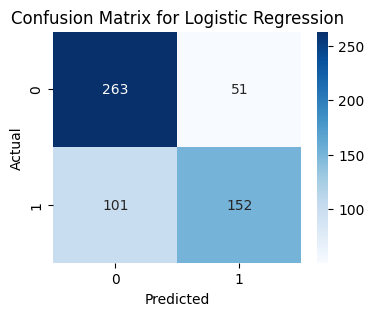

In [113]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_5727[["topic"]].copy()
eval_results["groundtruth"] = y_test_5727

# 資料準備
X_train_dense = X_train_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_dense = X_test_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_dense, y_train_5727)
        predictions = model.predict(X_test_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_tf, y_train_5727)
        predictions = model.predict(X_test_tf)
    else:
        model.fit(X_train_tfidf, y_train_5727)
        predictions = model.predict(X_test_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_5727, predictions)
    report = classification_report(y_test_5727, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_5727, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_5727, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_5727), yticklabels=np.unique(y_test_5727))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [114]:
eval_results

,topic,groundtruth,Random Forest,Naive Bayes (Gaussian),Naive Bayes (Multinomial),SVM,KNN,Logistic Regression
1250,Conflict,1,1,1,1,1,0,1
4276,Business,1,0,0,1,0,0,0
11146,Politics,0,0,0,0,0,0,0
8529,Society,0,0,0,0,0,0,0
9705,Society,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
650,Entertainment,1,1,1,0,1,0,1
4381,Politics,1,1,1,0,0,0,0
766,Entertainment,1,1,1,1,1,0,1
7042,Entertainment,0,0,0,0,0,0,0


In [115]:
results_dict = {}
# 計算每個主題的結果並印出表格
for topic in eval_results['topic'].unique():
    results_table = calculate_metrics(eval_results, topic)
    display(results_table)  # 使用 display 函式印出表格
    results_dict[topic] = results_table  # 保存到字典

# 計算所有主題的結果並印出表格
all_results_table = calculate_metrics(eval_results)
display(all_results_table)

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Conflict,Random Forest,53,0.641509,0.595745,"[[20, 5], [14, 14]]"
1,Conflict,Naive Bayes (Gaussian),53,0.641509,0.577778,"[[21, 4], [15, 13]]"
2,Conflict,Naive Bayes (Multinomial),53,0.528302,0.489796,"[[16, 9], [16, 12]]"
3,Conflict,SVM,53,0.566038,0.465116,"[[20, 5], [18, 10]]"
4,Conflict,KNN,53,0.490566,0.129032,"[[24, 1], [26, 2]]"
5,Conflict,Logistic Regression,53,0.603774,0.553191,"[[19, 6], [15, 13]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Business,Random Forest,26,0.653846,0.608696,"[[10, 1], [8, 7]]"
1,Business,Naive Bayes (Gaussian),26,0.576923,0.560000,"[[8, 3], [8, 7]]"
2,Business,Naive Bayes (Multinomial),26,0.500000,0.518519,"[[6, 5], [8, 7]]"
3,Business,SVM,26,0.692308,0.692308,"[[9, 2], [6, 9]]"
4,Business,KNN,26,0.461538,0.125000,"[[11, 0], [14, 1]]"
5,Business,Logistic Regression,26,0.692308,0.692308,"[[9, 2], [6, 9]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Politics,Random Forest,186,0.774194,0.761364,"[[77, 16], [26, 67]]"
1,Politics,Naive Bayes (Gaussian),186,0.720430,0.704545,"[[72, 21], [31, 62]]"
2,Politics,Naive Bayes (Multinomial),186,0.629032,0.576687,"[[70, 23], [46, 47]]"
3,Politics,SVM,186,0.774194,0.746988,"[[82, 11], [31, 62]]"
4,Politics,KNN,186,0.564516,0.295652,"[[88, 5], [76, 17]]"
5,Politics,Logistic Regression,186,0.747312,0.725146,"[[77, 16], [31, 62]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Society,Random Forest,152,0.769737,0.690265,"[[78, 19], [16, 39]]"
1,Society,Naive Bayes (Gaussian),152,0.710526,0.576923,"[[78, 19], [25, 30]]"
2,Society,Naive Bayes (Multinomial),152,0.717105,0.556701,"[[82, 15], [28, 27]]"
3,Society,SVM,152,0.756579,0.618557,"[[85, 12], [25, 30]]"
4,Society,KNN,152,0.644737,0.205882,"[[91, 6], [48, 7]]"
5,Society,Logistic Regression,152,0.743421,0.613861,"[[82, 15], [24, 31]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Entertainment,Random Forest,124,0.790323,0.704545,"[[67, 10], [16, 31]]"
1,Entertainment,Naive Bayes (Gaussian),124,0.758065,0.615385,"[[70, 7], [23, 24]]"
2,Entertainment,Naive Bayes (Multinomial),124,0.620968,0.471910,"[[56, 21], [26, 21]]"
3,Entertainment,SVM,124,0.790323,0.675000,"[[71, 6], [20, 27]]"
4,Entertainment,KNN,124,0.620968,0.175439,"[[72, 5], [42, 5]]"
5,Entertainment,Logistic Regression,124,0.790323,0.690476,"[[69, 8], [18, 29]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Health,Random Forest,26,0.653846,0.666667,"[[8, 3], [6, 9]]"
1,Health,Naive Bayes (Gaussian),26,0.653846,0.666667,"[[8, 3], [6, 9]]"
2,Health,Naive Bayes (Multinomial),26,0.461538,0.611111,"[[1, 10], [4, 11]]"
3,Health,SVM,26,0.500000,0.480000,"[[7, 4], [9, 6]]"
4,Health,KNN,26,0.461538,0.222222,"[[10, 1], [13, 2]]"
5,Health,Logistic Regression,26,0.576923,0.592593,"[[7, 4], [7, 8]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,全部,Random Forest,567,0.753086,0.704641,"[[260, 54], [86, 167]]"
1,全部,Naive Bayes (Gaussian),567,0.708995,0.637363,"[[257, 57], [108, 145]]"
2,全部,Naive Bayes (Multinomial),567,0.627866,0.542299,"[[231, 83], [128, 125]]"
3,全部,SVM,567,0.737213,0.659039,"[[274, 40], [109, 144]]"
4,全部,KNN,567,0.582011,0.222951,"[[296, 18], [219, 34]]"
5,全部,Logistic Regression,567,0.731922,0.666667,"[[263, 51], [101, 152]]"


# f. 類別-Society
* feature selection部分只看前20的話和全部資料的features重疊程度高(14/20)
* 整體accuracy大致落在0.6到0.8之間，表現最差的為KNN、最好的為Logistic regression

## feature selection





In [116]:
# Create a vectorizer to convert text data to numerical features

# 篩選 topic 欄位等於 'Society' 的資料
Xy_train = pd.concat([X_train, y_train], axis=1)
X_train_society = Xy_train[Xy_train['topic'] == 'Society'].drop(columns=['label', 'featured_text'])
y_train_society = Xy_train[Xy_train['topic'] == 'Society']['label']

Xy_val = pd.concat([X_val, y_val], axis=1)
X_val_society = Xy_val[Xy_val['topic'] == 'Society'].drop(columns=['label', 'featured_text'])
y_val_society = Xy_val[Xy_val['topic'] == 'Society']['label']

Xy_test = pd.concat([X_test, y_test], axis=1)
X_test_society = Xy_test[Xy_test['topic'] == 'Society'].drop(columns=['label', 'featured_text'])
y_test_society = Xy_test[Xy_test['topic'] == 'Society']['label']



vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_society['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_society)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

        feature   chi2_score        p_value
17994        wa  2448.418037   0.000000e+00
14505      said  2088.134753   0.000000e+00
7976         hi  1826.207605   0.000000e+00
7596         ha  1112.372548  6.757651e-244
17103     trump  1098.364356  7.488294e-241
12530     peopl  1047.059512  1.060368e-229
16668       thi  1001.188105  9.908657e-220
18593      year   897.972701  2.707271e-197
18481     would   848.204472  1.786152e-186
11935       one   813.354963  6.737232e-179
15839     state   724.058398  1.754576e-159
14630       say   642.708616  8.607108e-142
16781      time   591.389244  1.249480e-130
9884       like   582.464229  1.091598e-128
11198        mr   569.174672  8.488831e-126
13125    presid   537.160239  7.820230e-119
1223       also   535.078405  2.218830e-118
7260         go   514.324480  7.266735e-114
14187     right   502.624628  2.552156e-111
1270   american   487.521624  4.932662e-108


In [117]:
# 確認最後要的size
size = 1500
vocabulary = chi2_results_sorted["feature"].tolist()[:size]
society_features = set(vocabulary)

In [118]:
X_train_society.head()

,text,topic,tokenized_text,combined_text
14969,\n Rudy Giuliani releases another salacious ph...,Society,"[rudi, giuliani, releas, anoth, salaci, photo,...",rudi giuliani releas anoth salaci photo hunter...
15537,\nFourteen U.S. cities are planning to ban mea...,Society,"[fourteen, u.s., citi, plan, ban, meat, dairi,...",fourteen u.s. citi plan ban meat dairi product...
12916,\nAn image shared online in June 2023 authenti...,Society,"[imag, share, onlin, june, 2023, authent, show...",imag share onlin june 2023 authent show lion-f...
10676,What Is a Meme? The Meaning and HistoryMemes d...,Society,"[meme, mean, historymem, ’, start, internet, l...",meme mean historymem ’ start internet linguist...
8220,\nA video shows Bill Gates with breast implant...,Society,"[video, show, bill, gate, breast, implant, tra...",video show bill gate breast implant transit ma...


In [119]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_society['featured_text'] = X_train_society['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_val_society['featured_text'] = X_val_society['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)
X_test_society['featured_text'] = X_test_society['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary])
)

## vectorize

In [120]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_society_tfidf = tfidf_vectorizer.fit_transform(X_train_society['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_society_tfidf = tfidf_vectorizer.transform(X_val_society['featured_text'])
X_test_society_tfidf = tfidf_vectorizer.transform(X_test_society['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_society_tf = tf_vectorizer.fit_transform(X_train_society['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_society_tf = tf_vectorizer.transform(X_val_society['featured_text'])
X_test_society_tf = tf_vectorizer.transform(X_test_society['featured_text'])


# Print shapes to verify
print(f"X_train_society_tfidf shape: {X_train_society_tfidf.shape}")
print(f"X_val_society_tfidf shape: {X_val_society_tfidf.shape}")
print(f"X_test_society_tfidf shape: {X_test_society_tfidf.shape}")

print(f"X_train_society_tf shape: {X_train_society_tf.shape}")
print(f"X_val_society_tf shape: {X_val_society_tf.shape}")
print(f"X_test_society_tf shape: {X_test_society_tf.shape}")

X_train_society_tfidf shape: (3172, 1487)
X_val_society_tfidf shape: (388, 1487)
X_test_society_tfidf shape: (379, 1487)
X_train_society_tf shape: (3172, 1487)
X_val_society_tf shape: (388, 1487)
X_test_society_tf shape: (379, 1487)


## 訓練模型+評估模型

Evaluating Random Forest...
Random Forest Accuracy: 0.7994722955145118
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       236
           1       0.79      0.64      0.71       143

    accuracy                           0.80       379
   macro avg       0.80      0.77      0.78       379
weighted avg       0.80      0.80      0.79       379



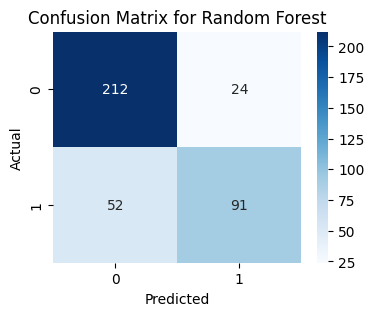

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.7757255936675461
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       236
           1       0.70      0.70      0.70       143

    accuracy                           0.78       379
   macro avg       0.76      0.76      0.76       379
weighted avg       0.78      0.78      0.78       379



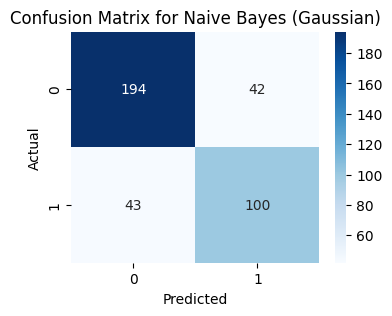

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.6912928759894459
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       236
           1       0.60      0.52      0.56       143

    accuracy                           0.69       379
   macro avg       0.67      0.66      0.66       379
weighted avg       0.68      0.69      0.69       379



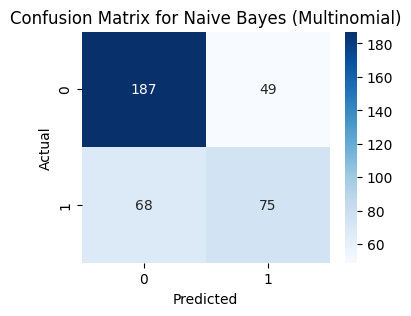

Evaluating SVM...
SVM Accuracy: 0.8100263852242744
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       236
           1       0.87      0.59      0.70       143

    accuracy                           0.81       379
   macro avg       0.83      0.77      0.78       379
weighted avg       0.82      0.81      0.80       379



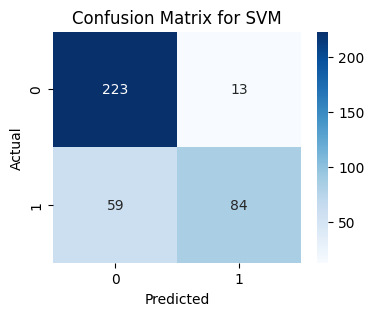

Evaluating KNN...
KNN Accuracy: 0.6174142480211082
              precision    recall  f1-score   support

           0       0.63      0.95      0.76       236
           1       0.45      0.06      0.11       143

    accuracy                           0.62       379
   macro avg       0.54      0.51      0.43       379
weighted avg       0.56      0.62      0.51       379



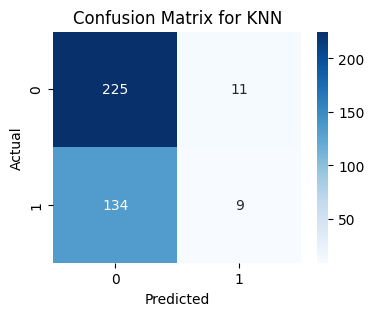

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.820580474934037
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       236
           1       0.88      0.61      0.72       143

    accuracy                           0.82       379
   macro avg       0.84      0.78      0.79       379
weighted avg       0.83      0.82      0.81       379



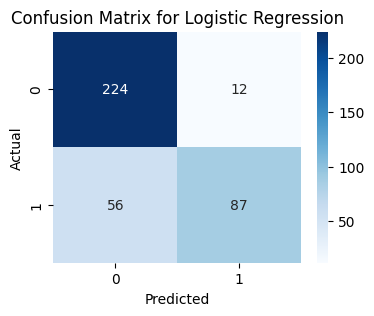

In [121]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_society[["topic"]].copy()
eval_results["groundtruth"] = y_test_society

# 資料準備
X_train_society_dense = X_train_society_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_society_dense = X_test_society_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_society_dense, y_train_society)
        predictions = model.predict(X_test_society_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_society_tf, y_train_society)
        predictions = model.predict(X_test_society_tf)
    else:
        model.fit(X_train_society_tfidf, y_train_society)
        predictions = model.predict(X_test_society_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_society, predictions)
    report = classification_report(y_test_society, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_society, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_society, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [122]:
results_table_society = calculate_metrics(eval_results, topic = "Society")
display(results_table_society)  # 使用 display 函式印出表格

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Society,Random Forest,379,0.799472,0.705426,"[[212, 24], [52, 91]]"
1,Society,Naive Bayes (Gaussian),379,0.775726,0.701754,"[[194, 42], [43, 100]]"
2,Society,Naive Bayes (Multinomial),379,0.691293,0.561798,"[[187, 49], [68, 75]]"
3,Society,SVM,379,0.810026,0.700000,"[[223, 13], [59, 84]]"
4,Society,KNN,379,0.617414,0.110429,"[[225, 11], [134, 9]]"
5,Society,Logistic Regression,379,0.820580,0.719008,"[[224, 12], [56, 87]]"


## 全部文章隨機抽 3939(3172+388+379) 筆




In [123]:
random_rows = df_filtered.sample(n=3939, random_state=42)  # random_state 確保結果可重現

In [124]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (combining validation and test)
X_train_3939, X_temp_3939, y_train_3939, y_temp_3939 = train_test_split(
    random_rows.drop('label', axis=1),  # Features (excluding the label column)
    random_rows['label'],  # Target variable (the label column)
    test_size=767,  # Size of the temporary set (validation + test)
    random_state=42,  # Set a random state for reproducibility
    stratify=random_rows['label'] # ensures the label proportions are maintained in each split
)

# Calculate the ratio of validation set within the temporary set
validation_ratio_temp = validation_ratio / (validation_ratio + test_ratio)

# Split the temporary set into validation and test sets
X_val_3939, X_test_3939, y_val_3939, y_test_3939 = train_test_split(
    X_temp_3939,
    y_temp_3939,
    test_size=379,
    random_state=42,
    stratify=y_temp_3939 # ensures the label proportions are maintained in each split
)

# Print the shapes of the resulting sets to verify the split
print(f"Training data shape: {X_train_3939.shape}, {y_train_3939.shape}")
print(f"Validation data shape: {X_val_3939.shape}, {y_val_3939.shape}")
print(f"Testing data shape: {X_test_3939.shape}, {y_test_3939.shape}")

Training data shape: (3172, 3), (3172,)
Validation data shape: (388, 3), (388,)
Testing data shape: (379, 3), (379,)


In [125]:
# prompt: do feature selection using chi-square
# Combine tokenized text into a single string for each document.
X_train_3939['combined_text'] = X_train_3939['tokenized_text'].apply(lambda x: ' '.join(x))

# Create a vectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_3939['combined_text'])

# Perform chi-squared test
chi2_scores, p_values = chi2(X_train_vec, y_train_3939)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'feature': feature_names, 'chi2_score': chi2_scores, 'p_value': p_values})

# Sort the results by chi2_score in descending order
chi2_results_sorted = chi2_results.sort_values(by='chi2_score', ascending=False)

print(chi2_results_sorted.head(20)) # Display top 20 features

      feature   chi2_score        p_value
22642      wa  2591.316897   0.000000e+00
18490    said  2387.858898   0.000000e+00
10725      hi  1342.197667  7.641676e-294
10319      ha  1329.300738  4.850814e-291
21055     thi  1326.137481  2.361695e-290
20073   state  1255.335561  5.748590e-275
21549   trump  1207.309194  1.573299e-264
16158   peopl  1195.424927  6.019932e-262
23321    year  1062.799419  4.021102e-233
2407    abort   982.158480  1.356451e-215
15502     one   913.863353  9.508669e-201
23179   would   888.972407  2.449645e-195
18645     say   772.764396  4.505052e-170
17874  report   763.093113  5.708472e-168
4152    biden   749.010887  6.583708e-165
16818  presid   701.487593  1.419769e-154
4948     call   692.065502  1.589011e-152
22249  vaccin   684.844103  5.908876e-151
21172    time   679.615776  8.099927e-150
14964     new   666.522424  5.700043e-147


In [126]:
# 確認最後要的size
size = 1500
vocabulary_3939 = chi2_results_sorted["feature"].tolist()[:size]
all_data_features_3939 = set(vocabulary_3939)

In [127]:
# 把 feature 黏貼回去-->拿去後面套套件的
X_train_3939['featured_text'] = X_train_3939['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_3939])
)
X_val_3939['featured_text'] = X_val_3939['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_3939])
)
X_test_3939['featured_text'] = X_test_3939['tokenized_text'].apply(
    lambda tokens: ' '.join([word for word in tokens if word in vocabulary_3939])
)

In [128]:
# 將文章轉為tf-idf與tf vector

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_3939['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val_3939['featured_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test_3939['featured_text'])

# Initialize TF vectorizer (CountVectorizer)
tf_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_tf = tf_vectorizer.fit_transform(X_train_3939['featured_text'])

# Transform validation and test data using the same vectorizer
X_val_tf = tf_vectorizer.transform(X_val_3939['featured_text'])
X_test_tf = tf_vectorizer.transform(X_test_3939['featured_text'])


# Print shapes to verify
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_val_tfidf shape: {X_val_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

print(f"X_train_tf shape: {X_train_tf.shape}")
print(f"X_val_tf shape: {X_val_tf.shape}")
print(f"X_test_tf shape: {X_test_tf.shape}")

X_train_tfidf shape: (3172, 1489)
X_val_tfidf shape: (388, 1489)
X_test_tfidf shape: (379, 1489)
X_train_tf shape: (3172, 1489)
X_val_tf shape: (388, 1489)
X_test_tf shape: (379, 1489)


Evaluating Random Forest...
Random Forest Accuracy: 0.7361477572559367
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       208
           1       0.74      0.64      0.69       171

    accuracy                           0.74       379
   macro avg       0.74      0.73      0.73       379
weighted avg       0.74      0.74      0.73       379



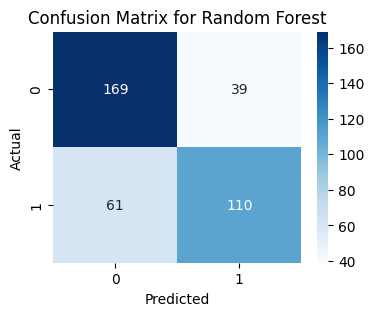

Evaluating Naive Bayes (Gaussian)...
Naive Bayes (Gaussian) Accuracy: 0.6939313984168866
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       208
           1       0.68      0.62      0.65       171

    accuracy                           0.69       379
   macro avg       0.69      0.69      0.69       379
weighted avg       0.69      0.69      0.69       379



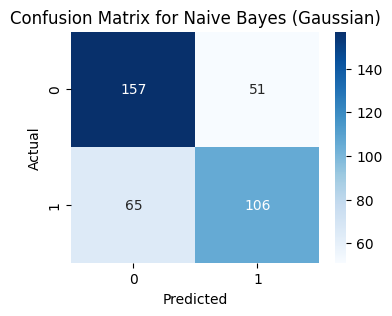

Evaluating Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.6490765171503958
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       208
           1       0.62      0.56      0.59       171

    accuracy                           0.65       379
   macro avg       0.65      0.64      0.64       379
weighted avg       0.65      0.65      0.65       379



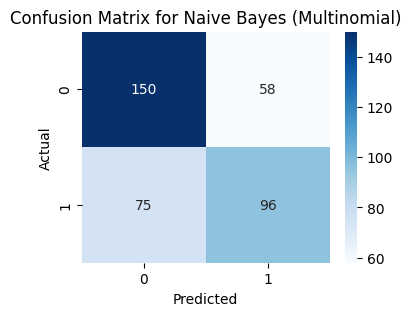

Evaluating SVM...
SVM Accuracy: 0.7308707124010554
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       208
           1       0.74      0.61      0.67       171

    accuracy                           0.73       379
   macro avg       0.73      0.72      0.72       379
weighted avg       0.73      0.73      0.73       379



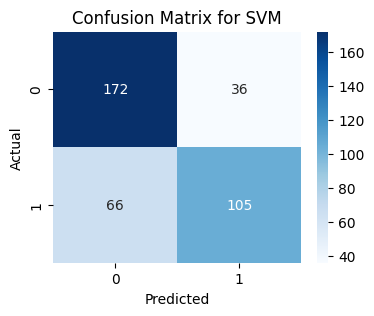

Evaluating KNN...
KNN Accuracy: 0.5646437994722955
              precision    recall  f1-score   support

           0       0.56      0.91      0.70       208
           1       0.57      0.14      0.23       171

    accuracy                           0.56       379
   macro avg       0.57      0.53      0.46       379
weighted avg       0.57      0.56      0.48       379



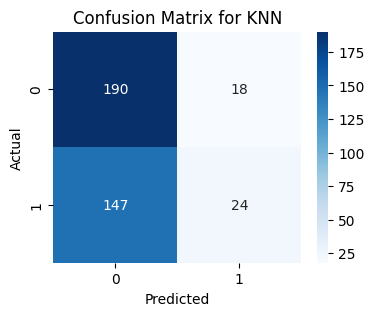

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.741424802110818
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       208
           1       0.74      0.67      0.70       171

    accuracy                           0.74       379
   macro avg       0.74      0.73      0.74       379
weighted avg       0.74      0.74      0.74       379



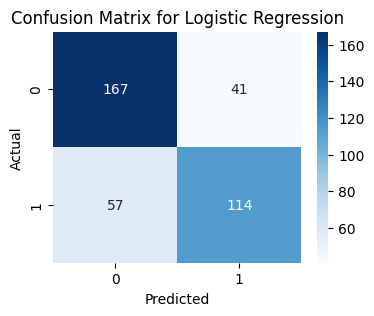

In [129]:
# 模型列表
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#紀錄結果
eval_results = X_test_3939[["topic"]].copy()
eval_results["groundtruth"] = y_test_3939

# 資料準備
X_train_dense = X_train_tfidf.toarray()  # GaussianNB 需要 dense array
X_test_dense = X_test_tfidf.toarray()

# 訓練和評估每個模型
for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == "Naive Bayes (Gaussian)":  # 特別處理 GaussianNB
        model.fit(X_train_dense, y_train_3939)
        predictions = model.predict(X_test_dense)
    elif name == "Naive Bayes (Multinomial)":  # 特別處理 MultinomialNB
        model.fit(X_train_tf, y_train_3939)
        predictions = model.predict(X_test_tf)
    else:
        model.fit(X_train_tfidf, y_train_3939)
        predictions = model.predict(X_test_tfidf)

    eval_results[name] = predictions

    # 計算 accuracy 和 classification_report
    acc = accuracy_score(y_test_3939, predictions)
    report = classification_report(y_test_3939, predictions, output_dict=True)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test_3939, predictions))

    # 繪製混淆矩陣
    cm = confusion_matrix(y_test_3939, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_3939), yticklabels=np.unique(y_test_3939))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [130]:
eval_results

,topic,groundtruth,Random Forest,Naive Bayes (Gaussian),Naive Bayes (Multinomial),SVM,KNN,Logistic Regression
3433,Entertainment,0,0,0,0,0,0,0
16872,Conflict,0,0,0,0,0,0,0
4122,Politics,1,0,0,1,0,0,0
276,Conflict,1,1,1,1,1,0,1
13007,Society,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1601,Conflict,1,1,1,1,1,0,1
1100,Business,1,1,1,1,1,1,1
4569,Conflict,0,1,0,0,0,0,0
13154,Politics,0,0,0,0,0,0,0


In [131]:
results_dict = {}
# 計算每個主題的結果並印出表格
for topic in eval_results['topic'].unique():
    results_table = calculate_metrics(eval_results, topic)
    display(results_table)  # 使用 display 函式印出表格
    results_dict[topic] = results_table  # 保存到字典

# 計算所有主題的結果並印出表格
all_results_table = calculate_metrics(eval_results)
display(all_results_table)

,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Entertainment,Random Forest,78,0.794872,0.733333,"[[40, 4], [12, 22]]"
1,Entertainment,Naive Bayes (Gaussian),78,0.666667,0.566667,"[[35, 9], [17, 17]]"
2,Entertainment,Naive Bayes (Multinomial),78,0.743590,0.687500,"[[36, 8], [12, 22]]"
3,Entertainment,SVM,78,0.692308,0.600000,"[[36, 8], [16, 18]]"
4,Entertainment,KNN,78,0.589744,0.304348,"[[39, 5], [27, 7]]"
5,Entertainment,Logistic Regression,78,0.705128,0.634921,"[[35, 9], [14, 20]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Conflict,Random Forest,51,0.627451,0.654545,"[[14, 3], [16, 18]]"
1,Conflict,Naive Bayes (Gaussian),51,0.607843,0.642857,"[[13, 4], [16, 18]]"
2,Conflict,Naive Bayes (Multinomial),51,0.509804,0.603175,"[[7, 10], [15, 19]]"
3,Conflict,SVM,51,0.705882,0.727273,"[[16, 1], [14, 20]]"
4,Conflict,KNN,51,0.352941,0.108108,"[[16, 1], [32, 2]]"
5,Conflict,Logistic Regression,51,0.725490,0.758621,"[[15, 2], [12, 22]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Politics,Random Forest,112,0.705357,0.702703,"[[40, 13], [20, 39]]"
1,Politics,Naive Bayes (Gaussian),112,0.705357,0.717949,"[[37, 16], [17, 42]]"
2,Politics,Naive Bayes (Multinomial),112,0.598214,0.571429,"[[37, 16], [29, 30]]"
3,Politics,SVM,112,0.705357,0.691589,"[[42, 11], [22, 37]]"
4,Politics,KNN,112,0.517857,0.250000,"[[49, 4], [50, 9]]"
5,Politics,Logistic Regression,112,0.696429,0.685185,"[[41, 12], [22, 37]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Society,Random Forest,103,0.834951,0.721311,"[[64, 10], [7, 22]]"
1,Society,Naive Bayes (Gaussian),103,0.786408,0.633333,"[[62, 12], [10, 19]]"
2,Society,Naive Bayes (Multinomial),103,0.699029,0.436364,"[[60, 14], [17, 12]]"
3,Society,SVM,103,0.844660,0.714286,"[[67, 7], [9, 20]]"
4,Society,KNN,103,0.708738,0.166667,"[[70, 4], [26, 3]]"
5,Society,Logistic Regression,103,0.825243,0.700000,"[[64, 10], [8, 21]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Business,Random Forest,18,0.666667,0.625000,"[[7, 4], [2, 5]]"
1,Business,Naive Bayes (Gaussian),18,0.555556,0.500000,"[[6, 5], [3, 4]]"
2,Business,Naive Bayes (Multinomial),18,0.722222,0.705882,"[[7, 4], [1, 6]]"
3,Business,SVM,18,0.611111,0.588235,"[[6, 5], [2, 5]]"
4,Business,KNN,18,0.666667,0.250000,"[[11, 0], [6, 1]]"
5,Business,Logistic Regression,18,0.722222,0.736842,"[[6, 5], [0, 7]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,Health,Random Forest,17,0.470588,0.470588,"[[4, 5], [4, 4]]"
1,Health,Naive Bayes (Gaussian),17,0.588235,0.631579,"[[4, 5], [2, 6]]"
2,Health,Naive Bayes (Multinomial),17,0.588235,0.666667,"[[3, 6], [1, 7]]"
3,Health,SVM,17,0.588235,0.588235,"[[5, 4], [3, 5]]"
4,Health,KNN,17,0.411765,0.285714,"[[5, 4], [6, 2]]"
5,Health,Logistic Regression,17,0.764706,0.777778,"[[6, 3], [1, 7]]"


,主題,模型,樣本數,Accuracy,F1-score,Contingency Table
0,全部,Random Forest,379,0.736148,0.687500,"[[169, 39], [61, 110]]"
1,全部,Naive Bayes (Gaussian),379,0.693931,0.646341,"[[157, 51], [65, 106]]"
2,全部,Naive Bayes (Multinomial),379,0.649077,0.590769,"[[150, 58], [75, 96]]"
3,全部,SVM,379,0.730871,0.673077,"[[172, 36], [66, 105]]"
4,全部,KNN,379,0.564644,0.225352,"[[190, 18], [147, 24]]"
5,全部,Logistic Regression,379,0.741425,0.699387,"[[167, 41], [57, 114]]"


# Feature selection 觀察
* 補了分析全部資料的特徵和個別主題資料特徵的相似程度 by 藍
* 每個類別類全部資料相同的特徵都超過2/3(1000個)

In [133]:
features = {"polictics": politics_features, "conflicits": conflict_features, "society": society_features,
            "entertainment": entertainment_features, "business": business_features, "health": health_features}

for topic, feature_set in features.items():
    common_features = len(feature_set.intersection(all_data_features))
    print(topic + "\n")
    print(f"Number of common features: {common_features}")

    # Calculate the number of features unique to all data.
    unique_to_all_data = len(all_data_features - feature_set)
    print(f"Number of features unique to all data: {unique_to_all_data}")

    # Calculate the number of features unique to topic.
    unique_to_topic = len(feature_set - all_data_features)
    print(f"Number of features unique to {topic} data: {unique_to_topic}")

    print("\n")

polictics

Number of common features: 1270
Number of features unique to all data: 230
Number of features unique to polictics data: 230


conflicits

Number of common features: 1082
Number of features unique to all data: 418
Number of features unique to conflicits data: 418


society

Number of common features: 1153
Number of features unique to all data: 347
Number of features unique to society data: 347


entertainment

Number of common features: 1212
Number of features unique to all data: 288
Number of features unique to entertainment data: 288


business

Number of common features: 1138
Number of features unique to all data: 362
Number of features unique to business data: 362


health

Number of common features: 1032
Number of features unique to all data: 468
Number of features unique to health data: 468


